In [1]:
# from src.data_download_tool import download_data, summarize_s3_structure
# from annotation_viewer import plot_annotations, plot_annotation_subset
from src.raw_datset import raw_dataset
# from src.plots import *
from src.s3client import S3Client
import os
from src.utilities import get_folders_in_directory, summarize_local_files, clear_local_caches, clear_local_cache, apply_bbox_corrections, apply_bbox_corrections_list, recalculate_all_statistics, generate_plots, regenerate_plots, delete_large_annotations, save_torch_script_model, view_folders, count_images_in_datasets, get_list_attribute, generate_original_dataset, get_list_of_empty_images, get_bbox_sizes, convert_collect_to_mp4, get_pixel_count

path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME03_Raw"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# View Fits File

SIMPLE: True
BITPIX: 16
NAXIS: 2
NAXIS1: 2394
NAXIS2: 1595
EXTEND: True
COMMENT:   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT:   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
BZERO: 32768
BSCALE: 1
OBSERVER: ATIK APX60 SN:1422202-0061
SBUUID: {11fc2934-ab21-4aba-b1c0-f7727dd97fbb}
EXPTIME: 3.0
SWCREATE: TheSkyX Version 10.5.0 Build 13339
COLORCCD: 0
DISPINCR: 1
PICTTYPE: 1
IMAGETYP: Light Frame
XORGSUBF: 0
YORGSUBF: 0
XBINNING: 4
YBINNING: 4
CCD-TEMP: -13.45
SET-TEMP: -14.0
SITELAT: +20 44 47.04
SITELONG: -156 25 53.3
LST: +22 37 25.33
OBSGEO-B: 20.7464
OBSGEO-L: -156.431469444444
OBSGEO-H: 103.8
BTP: 0
CENTAZ: 247.230321733623
CENTALT: 38.920373124296
AIRMASS: 1.59168586778445
TELEHA: +03 03 46.18
MOUNT: Paramount ME II
TELTKRA: 0.0
TELTKDEC: -0.0
OBJCTRA: 19 32 18.297
OBJCTDEC: -03 26 26.99
OBJECT: 54230
INSTRUME: ASCOM Camera
XPIXSZ: 15.039999961853
YPIXSZ: 15.039999961853
DATE-OBS: 2025-11-24T04:49:31.806
LOCALTIM: 11/24/2

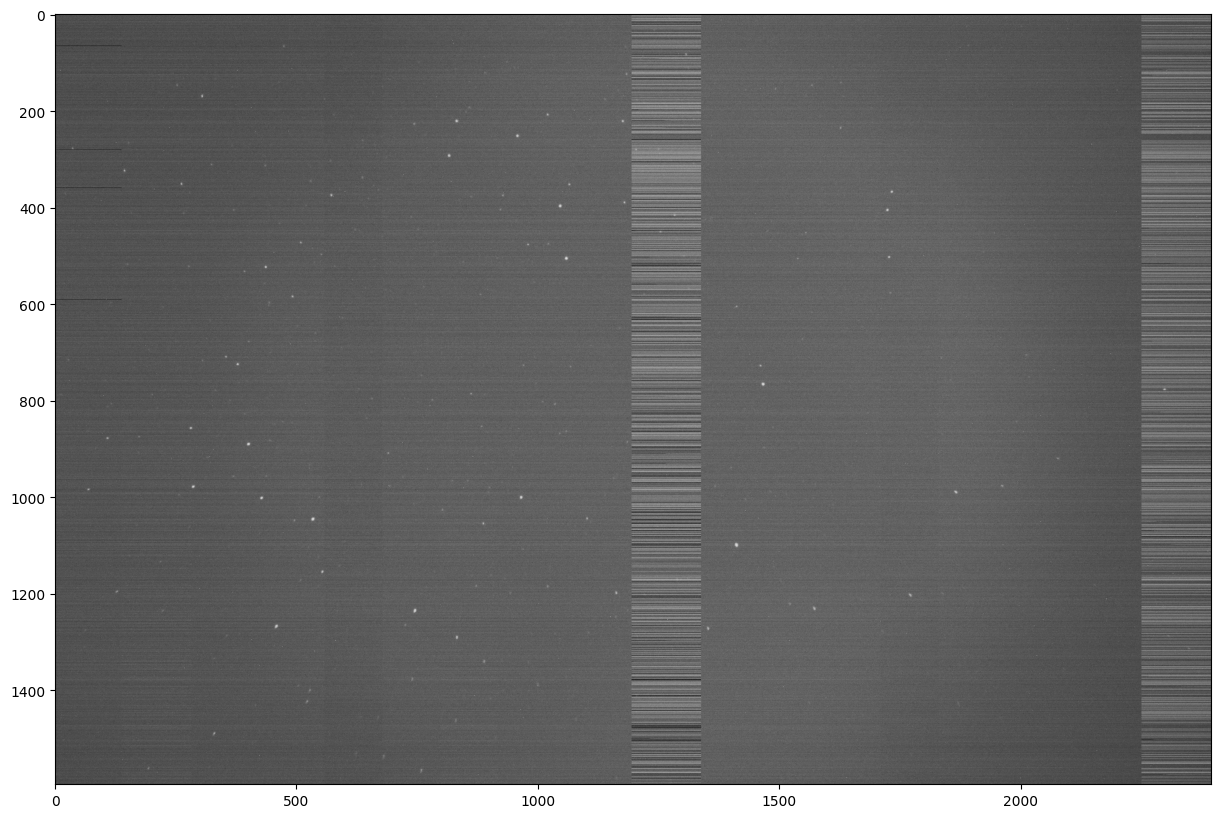

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from src.preprocess_functions import iqr_log, channel_mixture_C, zscale, raw_file

import numpy as np
from PIL import Image

fits_path = '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/random_data/4d6e9a59-82bb-474c-ab61-5cc66d94094d-4d6e9a59-82bb-474c-ab61-5cc66d94094d.fits'
hdu = fits.open(fits_path)
hdul = hdu[0]

img = Image.fromarray(raw_file(hdul.data).transpose(1,2,0))
img.save("out.png")

for key,value in hdul.header.items():
    print(f"{key}: {value}")

print(hdul.data.dtype)
plt.figure(figsize=(20, 10))
plt.imshow(iqr_log(hdul.data).transpose(1,2,0))
plt.show()


# View Folders in Directory

In [6]:
dirctoryA = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations"
dirctoryB = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025-Annotations"
dirctoryC = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/ABQ01-2025-Annotations"
dirctoryD = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01-2025-Annotations"
dirctoryE = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02-2025-Annotations"
grand_total = 0
for dirname in [dirctoryA,dirctoryB,dirctoryC,dirctoryD,dirctoryE]:
    total_images = 0
    for folder in os.listdir(dirname):
        if "." not in folder:
            total_images += count_images_in_datasets(os.path.join(dirname, folder))
    print(f"Dir: {dirname}, images:{total_images}")
    grand_total += total_images
print(f"Grand total, images:{grand_total}")

# dirctoryA = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets"
# grand_total = 0
# for dirname in [dirctoryA]:
#     total_images = 0
#     for folder in os.listdir(dirname):
#         if "." not in folder:
#             total_images += count_images_in_datasets(os.path.join(dirname, folder))
#     print(f"Dir: {dirname}, images:{total_images}")
#     grand_total += total_images
# print(f"Grand total, images:{grand_total}")



/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-10-13/raw_fits: 0
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-09-20/raw_fits: 396
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-09-06/raw_fits: 114
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-09-19/raw_fits: 36
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-09-04/raw_fits: 102
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-10-17/raw_fits: 268
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-10-15/raw_fits: 263
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-10-25/raw_fits: 881
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations/2025-10-23/raw_fits: 364
/data/Dataset_Compilation_and_Statistics

In [5]:
12113+2477+1014+4790+1603+46


22043

# Get Folders in Directory

In [2]:
directory = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw"
for folder in get_folders_in_directory(directory):
    print(folder)

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-08
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-09
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-09_copy
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-10
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-11
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-12
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-13
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-07-29
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-04
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat-2024-08-13-blank
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01_Raw/LMNT01Sat

# Summarize directory

In [3]:

summarize_local_files("/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025Data")

FileNotFoundError: [Errno 2] No such file or directory: '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025Data/raw_annotation/raw_annotation'

In [1]:
print(281+643+455+1112+730+406+1382+1209+535)

6753


# Generate Plots

In [ ]:
path1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected"
path2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected"
path3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected"
path4 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected"
paths = [path1, path2, path3, path4]
for path in paths:
    generate_plots(path)

file
file
Plotting Error: Centroid positions
Plotting Error: Line Streaks


# Remove Excess Empty Frames

In [12]:
#Pandas dataframes for referenece
dataset_path = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-08-29"
local_files = file_path_loader(dataset_path)

image_attributes = local_files.statistics_file.sample_attributes
annotation_attributes = local_files.statistics_file.annotation_attributes

samples_to_remove = int(.75*len(image_attributes[image_attributes['num_objects'] == 0]))

local_files.delete_files_from_sample(image_attributes[image_attributes['num_objects'] == 0].sample(samples_to_remove))
local_files.recalculate_statistics()
regenerate_plots(dataset_path)

Plotting Error: Line Streaks


# Clear Local Cache

In [2]:
clear_local_caches(path)

Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-24/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-24/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-25/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-25/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-26/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-26/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-27/annotations
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-27/images
Removed: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-04-28/annotations
Removed: /data/Dataset_Compila

# Apply bounding box corrections

In [3]:
path1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-14-injected"
path2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-15-injected"
path3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-16-injected"
path4 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04_Raw/RME04Sat-2024-05-17-injected"
paths = [path1, path2, path3, path4]

dirctoryA = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025Data"
dirctoryB = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025Data"

apply_bbox_corrections_list([dirctoryA, dirctoryB])

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025Data


100%|██████████| 10257/10257 [00:55<00:00, 186.03it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025Data/RME01-2025Data_Statistics.pkl


Recalculating Statistics: 100%|██████████| 10257/10257 [07:18<00:00, 23.41it/s]


/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025Data


100%|██████████| 22517/22517 [01:58<00:00, 190.41it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025Data/RME04-2025Data_Statistics.pkl


Recalculating Statistics: 100%|██████████| 22517/22517 [16:27<00:00, 22.81it/s]


In [3]:

S1 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08" # 81
S2 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09" # 53
S4 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14" # 257
S5 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15" # 99
S6 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16" # 165
S9 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31" # 832
S10 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04" # 427
S12 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05" # 607
S13 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06" # 287
S14 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07" # 536
S15 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08" # 215
S17 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10" # 420
S18 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11" # 35
S19 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12" # 430
S20 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13" # 663
S21 = "/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15" # 189

new_sets = [S1, S2, S4, S5, S6, S9, S10, S12, S13, S14, S15, S17, S18, S19, S20, S21]

apply_bbox_corrections_list(new_sets)


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08


100%|██████████| 142/142 [00:00<00:00, 244.04it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-08/RME04Sat-2024-05-08_Statistics.pkl


Recalculating Statistics: 100%|██████████| 142/142 [00:05<00:00, 24.39it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09


100%|██████████| 92/92 [00:00<00:00, 188.76it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-09/RME04Sat-2024-05-09_Statistics.pkl


Recalculating Statistics: 100%|██████████| 92/92 [00:03<00:00, 25.98it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14


100%|██████████| 460/460 [00:01<00:00, 252.16it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-14/RME04Sat-2024-05-14_Statistics.pkl


Recalculating Statistics: 100%|██████████| 460/460 [00:17<00:00, 26.69it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15


100%|██████████| 180/180 [00:00<00:00, 214.03it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-15/RME04Sat-2024-05-15_Statistics.pkl


Recalculating Statistics: 100%|██████████| 180/180 [00:06<00:00, 27.59it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16


100%|██████████| 300/300 [00:01<00:00, 255.70it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-16/RME04Sat-2024-05-16_Statistics.pkl


Recalculating Statistics: 100%|██████████| 300/300 [00:10<00:00, 27.29it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31


100%|██████████| 1426/1426 [00:07<00:00, 192.23it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-05-31/RME04Sat-2024-05-31_Statistics.pkl


Recalculating Statistics: 100%|██████████| 1426/1426 [00:54<00:00, 26.17it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04


100%|██████████| 736/736 [00:03<00:00, 184.46it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-04/RME04Sat-2024-06-04_Statistics.pkl


Recalculating Statistics: 100%|██████████| 736/736 [00:32<00:00, 22.36it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05


100%|██████████| 744/744 [00:03<00:00, 196.51it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-05/RME04Sat-2024-06-05_Statistics.pkl


Recalculating Statistics: 100%|██████████| 744/744 [00:31<00:00, 23.71it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06


100%|██████████| 245/245 [00:01<00:00, 201.23it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-06/RME04Sat-2024-06-06_Statistics.pkl


Recalculating Statistics: 100%|██████████| 245/245 [00:10<00:00, 24.17it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07


100%|██████████| 459/459 [00:02<00:00, 204.17it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-07/RME04Sat-2024-06-07_Statistics.pkl


Recalculating Statistics: 100%|██████████| 459/459 [00:18<00:00, 24.31it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08


100%|██████████| 184/184 [00:00<00:00, 208.36it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-08/RME04Sat-2024-06-08_Statistics.pkl


Recalculating Statistics: 100%|██████████| 184/184 [00:08<00:00, 22.01it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10


100%|██████████| 360/360 [00:01<00:00, 251.38it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-10/RME04Sat-2024-06-10_Statistics.pkl


Recalculating Statistics: 100%|██████████| 360/360 [00:14<00:00, 24.96it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11


100%|██████████| 30/30 [00:00<00:00, 211.43it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-11/RME04Sat-2024-06-11_Statistics.pkl


Recalculating Statistics: 100%|██████████| 30/30 [00:01<00:00, 22.13it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12


100%|██████████| 368/368 [00:01<00:00, 214.17it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-12/RME04Sat-2024-06-12_Statistics.pkl


Recalculating Statistics: 100%|██████████| 368/368 [00:15<00:00, 23.37it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13


100%|██████████| 566/566 [00:02<00:00, 212.32it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-13/RME04Sat-2024-06-13_Statistics.pkl


Recalculating Statistics: 100%|██████████| 566/566 [00:23<00:00, 23.65it/s]


/home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15


100%|██████████| 162/162 [00:00<00:00, 214.22it/s]


New database created at /home/davidchaparro/Repos/Dataset_Compilation_and_Statistics/data/RME04Sat-2024-06-15/RME04Sat-2024-06-15_Statistics.pkl


Recalculating Statistics: 100%|██████████| 162/162 [00:07<00:00, 22.83it/s]


# Recalculate All Statistics

In [ ]:
recalculate_all_statistics(path)


Num Samples: 1843
New database created at /mnt/c/Users/david.chaparro/Documents/Repos/Dataset_Statistics/data/LMNT01Sat-2025-04-30/LMNT01Sat-2025-04-30_Statistics.pkl


Recalculating Statistics:   1%|          | 22/1843 [00:10<13:53,  2.18it/s]


KeyboardInterrupt: 

# Convert Model to TorchScript

In [2]:
model_path = "/data/Sentinel_Datasets/Finalized_datasets/LMNT01Sat_Training_Channel_Mixture_C/models/LMNT01_MixtureC/retinanet_weights_E249.pt"
output_path = "/data/Sentinel_Datasets/Best_models"
name = "LMNT01"
save_torch_script_model(model_path, output_path,name)

/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torch/nn/functional.py:4624: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  * torch.tensor(scale_factors[i], dtype=torch.float32)
/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torchvision/ops/boxes.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes_x = torch.min(boxes_x, torch.tensor(width, dtype=boxes.dtype, device=boxes.device))
/home/davidchaparro/miniconda3/envs/DatasetStatistics/lib/python3.12/site-packages/torchvision/ops/boxes.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detac

RuntimeError: Only tensors, lists, tuples of tensors, or dictionary of tensors can be output from traced functions

# Inject Targets from Numpy Arrays

In [ ]:
path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME03_Raw"
segmentation_path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Injection_targets"
local_files = file_path_loader(path)
local_files.inject_targets_from_numpy(segmentation_path)

  0%|          | 0/3157 [00:00<?, ?it/s]

100%|██████████| 3157/3157 [00:52<00:00, 60.64it/s]


New database created at /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02_Raw/LMNT02Sat-2024-12-30-injected/LMNT02Sat-2024-12-30_Statistics.pkl


Recalculating Statistics: 100%|██████████| 3157/3157 [02:23<00:00, 22.07it/s]


# Print Aggregate statistics

In [3]:
directory = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets"
get_folders_in_directory(directory)

['/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_1',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_1_TTS',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_2',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_2_TTS',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_3',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_3_TTS',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_4',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_4_TTS',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_5',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_

In [7]:
Real1Step = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/train_TTS/train"]
Real2Step = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_High_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_Low_TTS/train"]
Real5Step = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_1_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_2_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_3_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_4_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_5_TTS/train"]
SIM1Step = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/train_TTS/train"]
SIM2Step = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_High_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_Low_TTS/train"]
SIM5STep = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_1_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_2_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_3_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_4_TTS/train",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_5_TTS/train"]
Real1StepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/train_TTS/val"]
Real2StepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_High_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_Low_TTS/val"]
Real5StepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_1_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_2_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_3_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_4_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_5_TTS/val"]
SIM1StepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/train_TTS/val"]
SIM2StepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_High_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_Low_TTS/val"]
SIM5STepVal = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_1_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_2_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_3_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_4_TTS/val",
            "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_5_TTS/val"]

# '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1',
# '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim',
base_real = ['/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_1',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_2',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_3',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_4',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_5',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_High',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1_Low']
base_sim = ['/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_1',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_2',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_3',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_4',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_5',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_High',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_Low',
 '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim_temp']
test_train_real = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/test",
                   "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/train"]
test_train_Sim = ["/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/test",
                   "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/train"]

for path in test_train_real:
    get_list_attribute(path, "local_snr")
for path in test_train_Sim:
    get_list_attribute(path, "snr")

Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/test
Save path: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Plots/NumpyArrays/test_local_snr.npy
	Length: 1630
	Min: -0.716677013743434
	Median: 103.34014836116748
	Mean: 318.75922343180935
	Max: 2639.012679379856
	std: 503.34629684249467
1630.00 & -0.72 & 103.34 & 2639.01
Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/train
Save path: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Plots/NumpyArrays/train_local_snr.npy
	Length: 6526
	Min: -1.6592119843382203
	Median: 93.73850774616066
	Mean: 337.65271004820823
	Max: 2711.6915787003445
	std: 593.3661399395133
6526.00 & -1.66 & 93.74 & 2711.69
Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/test
Save path: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Plots/NumpyArrays/test_snr.npy
	Length: 2400
	Min: 0.0
	Medi

Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/test
1630.00 & -0.72 & 103.34 & 2639.01
Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_L1/train
6526.00 & -1.66 & 93.74 & 2711.69
Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/test
2400.00 & 0.00 & 46.90 & 5982.47
Directory: /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/CL_Sim/train
9600.00 & 0.00 & 28.51 & 6537.57

# Generate Original Dataset from Preprocessed datasets

In [7]:
preprocessed_path = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_random_Overlap/val"
new_output_dir = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Experimental_datasets_unmodified/Panoptic_MC_LMNT01_train_random_Overlap_val"

generate_original_dataset(preprocessed_path, new_output_dir)
summarize_local_files(new_output_dir)

100%|██████████| 3837/3837 [01:52<00:00, 34.01it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Experimental_datasets_unmodified/Panoptic_MC_LMNT01_train_random_Overlap_val/raw_annotations/raw_annotation'

# Get empty image count

In [4]:
A1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_10_Overlap/train"
A2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_20_Overlap/train"
A3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_30_Overlap/train"
A4 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_30_Overlap/small_train"
A5 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_random_Overlap/train"
A6 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_random_Overlap/small_train"
A7 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/L1_10_overlap_R=0.33/train"
A8 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/L1_10_overlap_R=1/train"
A9 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/L1_10_overlap_R=2/train"
A10 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/L1_10_overlap_R=5/train"

for a in [A1,A2,A3,A4,A5,A6,A7,A8,A9,A10]:
    get_list_of_empty_images(a)



/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_10_Overlap/train
Num Images = 10058.00, Num images with target = 6508.00, Num images without target = 3550.00, ratio=0.55, Percent empty = 0.35
&10058.00&6508.00&3550.00&0.55&0.35\\
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_20_Overlap/train
Num Images = 10322.00, Num images with target = 6738.00, Num images without target = 3584.00, ratio=0.53, Percent empty = 0.35
&10322.00&6738.00&3584.00&0.53&0.35\\
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_30_Overlap/train
Num Images = 26863.00, Num images with target = 17699.00, Num images without target = 9164.00, ratio=0.52, Percent empty = 0.34
&26863.00&17699.00&9164.00&0.52&0.34\\
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Panoptic_MC_LMNT01_train_30_Overlap/small_train
Num Images = 1000

# Get widths and heights

In [2]:
A1 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_LMNT01"
A2 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_LMNT02"
A3 = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_RME04"
for a in [A1,A2,A3]:
    get_bbox_sizes(a, "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Plots/SPIEFutureSensingImageChipping/NoStopping", color="#47A5B2FF")
    print()




/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_LMNT01
AVG area=0.00, Median area=0.00, Min area=0.00, max area=0.02
AVG width=0.00, Median width=0.00, Min width=0.00, max width=0.01
AVG height=0.01, Median height=0.01, Min height=0.00, max height=0.01

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_LMNT02
AVG area=0.00, Median area=0.00, Min area=0.00, max area=0.01
AVG width=0.00, Median width=0.00, Min width=0.00, max width=0.01
AVG height=0.00, Median height=0.00, Min height=0.00, max height=0.01

/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/Finalized_datasets/Small_Eval_RME04
AVG area=0.00, Median area=0.00, Min area=0.00, max area=0.02
AVG width=0.00, Median width=0.00, Min width=0.00, max width=0.01
AVG height=0.01, Median height=0.01, Min height=0.00, max height=0.01



# Generate MP4s from Collects

In [3]:
convert_collect_to_mp4("/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024", FPS=3)

MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/886276f6-b503-4e2f-bc19-8267e1b87ec9.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/886276f6-b503-4e2f-bc19-8267e1b87ec9.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/886276f6-b503-4e2f-bc19-8267e1b87ec9.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/86152261-0641-41ca-9888-78221520d6be.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/86152261-0641-41ca-9888-78221520d6be.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/86152261-0641-41ca-9888-78221520d6be.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42fdc071-c4f2-4618-9308-5b1861698e84.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42fdc071-c4f2-4618-9308-5b1861698e84.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42fdc071-c4f2-4618-9308-5b1861698e84.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05e62473-24fe-4bec-a1ec-1dabebaf0990.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05e62473-24fe-4bec-a1ec-1dabebaf0990.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05e62473-24fe-4bec-a1ec-1dabebaf0990.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/157688d2-15c3-46e9-80a8-05ab94391a61.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/157688d2-15c3-46e9-80a8-05ab94391a61.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/157688d2-15c3-46e9-80a8-05ab94391a61.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ee33b02-e458-4b08-9265-20ce6fb92f00.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ee33b02-e458-4b08-9265-20ce6fb92f00.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ee33b02-e458-4b08-9265-20ce6fb92f00.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bcd1f42e-fc2f-489c-aa81-3d152f199c21.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bcd1f42e-fc2f-489c-aa81-3d152f199c21.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bcd1f42e-fc2f-489c-aa81-3d152f199c21.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/20046d26-3511-4192-81ed-971ad19f4c70.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/20046d26-3511-4192-81ed-971ad19f4c70.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/20046d26-3511-4192-81ed-971ad19f4c70.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a04243-e9cd-4af6-89e8-a35f20099a56.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a04243-e9cd-4af6-89e8-a35f20099a56.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a04243-e9cd-4af6-89e8-a35f20099a56.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b384fca-8639-478e-9eba-5bbd1e19a958.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b384fca-8639-478e-9eba-5bbd1e19a958.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b384fca-8639-478e-9eba-5bbd1e19a958.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31f3967a-363a-4dc0-b1c0-3f28705a5836.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31f3967a-363a-4dc0-b1c0-3f28705a5836.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31f3967a-363a-4dc0-b1c0-3f28705a5836.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/68b711b4-cda8-4cd2-8158-dbd0b4dca71d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/68b711b4-cda8-4cd2-8158-dbd0b4dca71d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/68b711b4-cda8-4cd2-8158-dbd0b4dca71d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/820c4b33-15fd-437b-9181-c1e9b28b82c0-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/820c4b33-15fd-437b-9181-c1e9b28b82c0-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/820c4b33-15fd-437b-9181-c1e9b28b82c0-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae5c1324-2e9a-4bba-88ac-f99dc4d84427-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae5c1324-2e9a-4bba-88ac-f99dc4d84427-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae5c1324-2e9a-4bba-88ac-f99dc4d84427-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a00100b3-ae54-4390-92cf-91cd1587e1b8-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a00100b3-ae54-4390-92cf-91cd1587e1b8-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a00100b3-ae54-4390-92cf-91cd1587e1b8-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05495a87-7e8e-4dd2-ae95-ded302a56bdb.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05495a87-7e8e-4dd2-ae95-ded302a56bdb.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05495a87-7e8e-4dd2-ae95-ded302a56bdb.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fe08a52-b1dc-48ed-a265-13bc88192aa4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fe08a52-b1dc-48ed-a265-13bc88192aa4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fe08a52-b1dc-48ed-a265-13bc88192aa4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/70f9cf4c-40e5-4120-b06b-d4b95f0158a4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/70f9cf4c-40e5-4120-b06b-d4b95f0158a4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/70f9cf4c-40e5-4120-b06b-d4b95f0158a4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78931c3d-567d-49f6-acc4-2f5dec5c3ba1.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78931c3d-567d-49f6-acc4-2f5dec5c3ba1.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78931c3d-567d-49f6-acc4-2f5dec5c3ba1.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce201256-3c2d-4e29-b3e4-1290af906fc7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce201256-3c2d-4e29-b3e4-1290af906fc7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce201256-3c2d-4e29-b3e4-1290af906fc7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee571782-f408-4177-bf55-9a95ad8446b8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee571782-f408-4177-bf55-9a95ad8446b8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee571782-f408-4177-bf55-9a95ad8446b8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f774ccaf-81e1-4de3-a266-a9ee98c82c7d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f774ccaf-81e1-4de3-a266-a9ee98c82c7d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f774ccaf-81e1-4de3-a266-a9ee98c82c7d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4aa78bbd-f5e7-4f7a-85b0-466f298d9b4d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4aa78bbd-f5e7-4f7a-85b0-466f298d9b4d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4aa78bbd-f5e7-4f7a-85b0-466f298d9b4d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/79fa479b-651c-44ee-ae6a-4c068f03bd3c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/79fa479b-651c-44ee-ae6a-4c068f03bd3c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/79fa479b-651c-44ee-ae6a-4c068f03bd3c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4da398e-c16e-45bf-82e1-b8cc2f92c1a7-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4da398e-c16e-45bf-82e1-b8cc2f92c1a7-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4da398e-c16e-45bf-82e1-b8cc2f92c1a7-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77a4ea8c-0212-453d-89d1-2f64369c84b3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77a4ea8c-0212-453d-89d1-2f64369c84b3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77a4ea8c-0212-453d-89d1-2f64369c84b3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5338347a-2fd2-45cd-a686-da4f61708211.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5338347a-2fd2-45cd-a686-da4f61708211.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5338347a-2fd2-45cd-a686-da4f61708211.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05d18d7b-dc07-4ab0-9948-4521444957f4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05d18d7b-dc07-4ab0-9948-4521444957f4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/05d18d7b-dc07-4ab0-9948-4521444957f4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/182addbe-5089-4cac-8a65-b019edefdfe5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/182addbe-5089-4cac-8a65-b019edefdfe5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/182addbe-5089-4cac-8a65-b019edefdfe5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0717b41-439a-4d23-92ad-24b587c74602-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0717b41-439a-4d23-92ad-24b587c74602-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0717b41-439a-4d23-92ad-24b587c74602-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4129103-bcbf-49c2-8be5-1f9271aeff0a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4129103-bcbf-49c2-8be5-1f9271aeff0a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4129103-bcbf-49c2-8be5-1f9271aeff0a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3416b951-39ca-4fc2-9747-0efe91d5be66.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3416b951-39ca-4fc2-9747-0efe91d5be66.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3416b951-39ca-4fc2-9747-0efe91d5be66.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9b057de-88ac-4bcb-8f95-d61aee678ea6-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9b057de-88ac-4bcb-8f95-d61aee678ea6-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9b057de-88ac-4bcb-8f95-d61aee678ea6-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea4f5246-cc14-4bc2-bb39-5185a6a5bb2c-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea4f5246-cc14-4bc2-bb39-5185a6a5bb2c-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea4f5246-cc14-4bc2-bb39-5185a6a5bb2c-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cad9b4af-39f5-4fc9-8737-a7f839b28d8f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cad9b4af-39f5-4fc9-8737-a7f839b28d8f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cad9b4af-39f5-4fc9-8737-a7f839b28d8f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43258fc-a707-4b4f-9627-4451e8b7a410-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43258fc-a707-4b4f-9627-4451e8b7a410-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43258fc-a707-4b4f-9627-4451e8b7a410-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9c904d5a-9912-47c7-b19d-6fd02705b544.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9c904d5a-9912-47c7-b19d-6fd02705b544.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9c904d5a-9912-47c7-b19d-6fd02705b544.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afeafbd-05e7-4694-b009-2c81e6a791e9.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afeafbd-05e7-4694-b009-2c81e6a791e9.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afeafbd-05e7-4694-b009-2c81e6a791e9.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8870e49d-ec21-43da-b2d1-69f06e0346e3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8870e49d-ec21-43da-b2d1-69f06e0346e3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8870e49d-ec21-43da-b2d1-69f06e0346e3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6ff7ec7e-7c86-44d9-b2f3-23989ca51487-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6ff7ec7e-7c86-44d9-b2f3-23989ca51487-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6ff7ec7e-7c86-44d9-b2f3-23989ca51487-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a359c800-6879-4e58-a044-e3de97f765bc-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a359c800-6879-4e58-a044-e3de97f765bc-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a359c800-6879-4e58-a044-e3de97f765bc-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29f91949-8edf-4992-a388-b6b93cfb6706.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29f91949-8edf-4992-a388-b6b93cfb6706.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29f91949-8edf-4992-a388-b6b93cfb6706.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c86c96f-f527-4754-ad55-1d67c31df6c7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c86c96f-f527-4754-ad55-1d67c31df6c7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c86c96f-f527-4754-ad55-1d67c31df6c7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6f449c73-929f-4057-8262-9d56bcb98f1a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6f449c73-929f-4057-8262-9d56bcb98f1a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6f449c73-929f-4057-8262-9d56bcb98f1a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1b7be6c-5509-4430-9242-bfa21ad245ed.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1b7be6c-5509-4430-9242-bfa21ad245ed.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1b7be6c-5509-4430-9242-bfa21ad245ed.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dbac56a-be84-4f9f-abe8-2c01975408fe.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dbac56a-be84-4f9f-abe8-2c01975408fe.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dbac56a-be84-4f9f-abe8-2c01975408fe.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccd85887-94a8-41f9-9c6f-ee4637340d00.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccd85887-94a8-41f9-9c6f-ee4637340d00.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccd85887-94a8-41f9-9c6f-ee4637340d00.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2da65125-dc26-4ed8-ad1d-079659d321fe-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2da65125-dc26-4ed8-ad1d-079659d321fe-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2da65125-dc26-4ed8-ad1d-079659d321fe-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5d1a0172-e9e6-4987-b82b-a20805b4fac6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5d1a0172-e9e6-4987-b82b-a20805b4fac6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5d1a0172-e9e6-4987-b82b-a20805b4fac6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c93b544c-dc49-46bb-b5f0-ca2e2333eba4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c93b544c-dc49-46bb-b5f0-ca2e2333eba4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c93b544c-dc49-46bb-b5f0-ca2e2333eba4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e1789f27-784b-4a00-b009-1be8bf1cca6d-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e1789f27-784b-4a00-b009-1be8bf1cca6d-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e1789f27-784b-4a00-b009-1be8bf1cca6d-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1624358262398103938.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1624358262398103938.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1624358262398103938.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9decb04a-99e5-4d8a-8f1f-d1db4ddc8546.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9decb04a-99e5-4d8a-8f1f-d1db4ddc8546.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9decb04a-99e5-4d8a-8f1f-d1db4ddc8546.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3365ba8b-8d15-4213-99af-61bd2cb73792.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3365ba8b-8d15-4213-99af-61bd2cb73792.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3365ba8b-8d15-4213-99af-61bd2cb73792.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/adc470a1-0c26-4035-b63e-3ab31b904b5c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/adc470a1-0c26-4035-b63e-3ab31b904b5c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/adc470a1-0c26-4035-b63e-3ab31b904b5c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b826bd5-ce76-4026-8b75-8184373ff5e0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b826bd5-ce76-4026-8b75-8184373ff5e0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b826bd5-ce76-4026-8b75-8184373ff5e0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddb61bbb-1b59-4d4d-94f8-b2e45d63b5dd.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddb61bbb-1b59-4d4d-94f8-b2e45d63b5dd.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddb61bbb-1b59-4d4d-94f8-b2e45d63b5dd.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4b6a4374-4957-44ee-a2de-7665e3499134-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4b6a4374-4957-44ee-a2de-7665e3499134-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4b6a4374-4957-44ee-a2de-7665e3499134-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a91c3d3a-3740-41f9-b05c-2555dde9a33d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a91c3d3a-3740-41f9-b05c-2555dde9a33d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a91c3d3a-3740-41f9-b05c-2555dde9a33d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/165defbd-bf06-4af7-8b94-f0ce3b8254cc-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/165defbd-bf06-4af7-8b94-f0ce3b8254cc-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/165defbd-bf06-4af7-8b94-f0ce3b8254cc-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ae417ba-21c2-4ab9-8d2f-3ff7b5d51b1b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ae417ba-21c2-4ab9-8d2f-3ff7b5d51b1b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ae417ba-21c2-4ab9-8d2f-3ff7b5d51b1b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7667618-032c-415b-ab39-a857ee908df2.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7667618-032c-415b-ab39-a857ee908df2.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7667618-032c-415b-ab39-a857ee908df2.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/04a642e5-fca0-4a70-9beb-19a2d1b77d7f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/04a642e5-fca0-4a70-9beb-19a2d1b77d7f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/04a642e5-fca0-4a70-9beb-19a2d1b77d7f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b4a7184-0d70-4fc5-8e7a-6cae14424277.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b4a7184-0d70-4fc5-8e7a-6cae14424277.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b4a7184-0d70-4fc5-8e7a-6cae14424277.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/59eade0c-684f-4987-b669-59323ebefdc4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/59eade0c-684f-4987-b669-59323ebefdc4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/59eade0c-684f-4987-b669-59323ebefdc4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5857b5-1f92-427f-9886-25dbb0430ca2.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5857b5-1f92-427f-9886-25dbb0430ca2.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5857b5-1f92-427f-9886-25dbb0430ca2.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1096534091763113653.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1096534091763113653.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1096534091763113653.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc12fc63-4c5f-4130-9f11-490e3444ec0b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc12fc63-4c5f-4130-9f11-490e3444ec0b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc12fc63-4c5f-4130-9f11-490e3444ec0b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/00c4b4b3-ad53-472f-bfab-23cf7683196b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/00c4b4b3-ad53-472f-bfab-23cf7683196b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/00c4b4b3-ad53-472f-bfab-23cf7683196b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/25c60f6c-9185-4231-8f4d-4b353a6e03c8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/25c60f6c-9185-4231-8f4d-4b353a6e03c8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/25c60f6c-9185-4231-8f4d-4b353a6e03c8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1f9af39-3643-4332-b159-9b654c7d4546.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1f9af39-3643-4332-b159-9b654c7d4546.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1f9af39-3643-4332-b159-9b654c7d4546.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d3c7642-c348-4d39-ac72-873ff1467c2f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d3c7642-c348-4d39-ac72-873ff1467c2f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d3c7642-c348-4d39-ac72-873ff1467c2f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec590c49-09d2-4173-9f04-7fc4e2644ee1-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec590c49-09d2-4173-9f04-7fc4e2644ee1-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec590c49-09d2-4173-9f04-7fc4e2644ee1-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/981af199-68a1-4b3d-bb38-aab7878da634.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/981af199-68a1-4b3d-bb38-aab7878da634.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/981af199-68a1-4b3d-bb38-aab7878da634.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fc26ca52-5a20-4623-869d-7088dd4beb83.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fc26ca52-5a20-4623-869d-7088dd4beb83.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fc26ca52-5a20-4623-869d-7088dd4beb83.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78f638da-6e32-4376-8589-03672693fb50.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78f638da-6e32-4376-8589-03672693fb50.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78f638da-6e32-4376-8589-03672693fb50.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eca31316-8068-49b4-9d13-84c39ef24300.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eca31316-8068-49b4-9d13-84c39ef24300.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eca31316-8068-49b4-9d13-84c39ef24300.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e95c36f-6bc3-4beb-9783-ff3132edd110.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e95c36f-6bc3-4beb-9783-ff3132edd110.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e95c36f-6bc3-4beb-9783-ff3132edd110.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8da5980c-f8c4-4aa8-9336-95f6e875925a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8da5980c-f8c4-4aa8-9336-95f6e875925a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8da5980c-f8c4-4aa8-9336-95f6e875925a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7f500dd-2a3d-4f28-a921-7d41dcf8776a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7f500dd-2a3d-4f28-a921-7d41dcf8776a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7f500dd-2a3d-4f28-a921-7d41dcf8776a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f95f602a-cd25-43e0-8d90-e15be55998ca-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f95f602a-cd25-43e0-8d90-e15be55998ca-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f95f602a-cd25-43e0-8d90-e15be55998ca-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/db7089ee-7c8f-4318-9175-d307b54262fe.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/db7089ee-7c8f-4318-9175-d307b54262fe.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/db7089ee-7c8f-4318-9175-d307b54262fe.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c0484674-ac59-4105-b81f-5e3fd853414b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c0484674-ac59-4105-b81f-5e3fd853414b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c0484674-ac59-4105-b81f-5e3fd853414b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a938c9d1-975a-40c8-8754-70b0afd8cb72.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a938c9d1-975a-40c8-8754-70b0afd8cb72.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a938c9d1-975a-40c8-8754-70b0afd8cb72.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c89b69a7-031b-4e7c-9700-283de6bb5e9f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c89b69a7-031b-4e7c-9700-283de6bb5e9f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c89b69a7-031b-4e7c-9700-283de6bb5e9f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/54475770-66cc-4c9f-8ac6-1c2d32cc2b86.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/54475770-66cc-4c9f-8ac6-1c2d32cc2b86.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/54475770-66cc-4c9f-8ac6-1c2d32cc2b86.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1f8dc7d-f29a-416c-a526-ae5c31415914.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1f8dc7d-f29a-416c-a526-ae5c31415914.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1f8dc7d-f29a-416c-a526-ae5c31415914.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44b2d7ed-9d21-4584-86ca-0ef3dfb102cf.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44b2d7ed-9d21-4584-86ca-0ef3dfb102cf.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44b2d7ed-9d21-4584-86ca-0ef3dfb102cf.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/906dd5a4-b28a-412c-a7f0-4356b8321243.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/906dd5a4-b28a-412c-a7f0-4356b8321243.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/906dd5a4-b28a-412c-a7f0-4356b8321243.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f9a61eb9-577d-4fd6-99ee-16ccd376e98b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f9a61eb9-577d-4fd6-99ee-16ccd376e98b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f9a61eb9-577d-4fd6-99ee-16ccd376e98b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/119384d5-9074-4eab-bc29-d21705caf370.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/119384d5-9074-4eab-bc29-d21705caf370.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/119384d5-9074-4eab-bc29-d21705caf370.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aabd78e2-b25c-487b-a68c-b81fa78fe944.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aabd78e2-b25c-487b-a68c-b81fa78fe944.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aabd78e2-b25c-487b-a68c-b81fa78fe944.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d6b280ef-01a8-4746-82f2-7d917374121d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d6b280ef-01a8-4746-82f2-7d917374121d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d6b280ef-01a8-4746-82f2-7d917374121d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0d9d5516-19f0-4936-9138-5453b4944871.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0d9d5516-19f0-4936-9138-5453b4944871.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0d9d5516-19f0-4936-9138-5453b4944871.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae440bc8-2557-4c22-9241-956cd2c6aa68.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae440bc8-2557-4c22-9241-956cd2c6aa68.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ae440bc8-2557-4c22-9241-956cd2c6aa68.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b5a58316-3e0d-4dd1-ba42-84d6367ed76e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b5a58316-3e0d-4dd1-ba42-84d6367ed76e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b5a58316-3e0d-4dd1-ba42-84d6367ed76e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3649dfe-615d-4a99-aebd-50a83f0378a0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3649dfe-615d-4a99-aebd-50a83f0378a0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3649dfe-615d-4a99-aebd-50a83f0378a0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a6d02302-49b1-421e-b864-f85c92f2678c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a6d02302-49b1-421e-b864-f85c92f2678c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a6d02302-49b1-421e-b864-f85c92f2678c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69c94259-8fe4-41e3-bfbd-243192c57114-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69c94259-8fe4-41e3-bfbd-243192c57114-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69c94259-8fe4-41e3-bfbd-243192c57114-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ec5e35c-2d32-4578-9fc9-ec516e607e2f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ec5e35c-2d32-4578-9fc9-ec516e607e2f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ec5e35c-2d32-4578-9fc9-ec516e607e2f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5016b448-dbf0-49b6-a6a0-a4d991d888c4-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5016b448-dbf0-49b6-a6a0-a4d991d888c4-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5016b448-dbf0-49b6-a6a0-a4d991d888c4-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e4662a57-07c7-4e68-9e8e-704a3b79acf0-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e4662a57-07c7-4e68-9e8e-704a3b79acf0-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e4662a57-07c7-4e68-9e8e-704a3b79acf0-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/48b4720a-a59f-471f-b887-427ec6e1398a-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/48b4720a-a59f-471f-b887-427ec6e1398a-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/48b4720a-a59f-471f-b887-427ec6e1398a-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f205f98-0655-47ae-a735-c5042e55e6ba-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f205f98-0655-47ae-a735-c5042e55e6ba-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f205f98-0655-47ae-a735-c5042e55e6ba-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc4843aa-afde-4aaf-99ab-67d043ca1134.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc4843aa-afde-4aaf-99ab-67d043ca1134.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc4843aa-afde-4aaf-99ab-67d043ca1134.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8aebed2-1e7c-477a-b1a5-4089dc10b9df-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8aebed2-1e7c-477a-b1a5-4089dc10b9df-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8aebed2-1e7c-477a-b1a5-4089dc10b9df-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43837e1-59c2-4a90-b65b-235cc075a659.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43837e1-59c2-4a90-b65b-235cc075a659.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a43837e1-59c2-4a90-b65b-235cc075a659.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7a39fab-0337-4e2b-a12c-33d15f34da78.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7a39fab-0337-4e2b-a12c-33d15f34da78.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7a39fab-0337-4e2b-a12c-33d15f34da78.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec3c7863-a704-4600-8932-443a2c5ea1ab.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec3c7863-a704-4600-8932-443a2c5ea1ab.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec3c7863-a704-4600-8932-443a2c5ea1ab.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7d10af31-618c-4f7d-912f-0321e72f2bf5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7d10af31-618c-4f7d-912f-0321e72f2bf5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7d10af31-618c-4f7d-912f-0321e72f2bf5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bf3fc266-e370-47c6-b859-ba16b2628378.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bf3fc266-e370-47c6-b859-ba16b2628378.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bf3fc266-e370-47c6-b859-ba16b2628378.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b1e09a7-8b93-4dc3-bb84-284d019b9a5f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b1e09a7-8b93-4dc3-bb84-284d019b9a5f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3b1e09a7-8b93-4dc3-bb84-284d019b9a5f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cc3e22c-28b7-4c7f-acd1-1a3c7960238e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cc3e22c-28b7-4c7f-acd1-1a3c7960238e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cc3e22c-28b7-4c7f-acd1-1a3c7960238e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/788afc3f-48e9-4fc0-b4ce-20db2bd33d83.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/788afc3f-48e9-4fc0-b4ce-20db2bd33d83.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/788afc3f-48e9-4fc0-b4ce-20db2bd33d83.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/55d8edec-380a-46bc-8bac-73286603924e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/55d8edec-380a-46bc-8bac-73286603924e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/55d8edec-380a-46bc-8bac-73286603924e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/49b1077e-dbf1-499a-8170-2e8b146b2d34.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/49b1077e-dbf1-499a-8170-2e8b146b2d34.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/49b1077e-dbf1-499a-8170-2e8b146b2d34.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f94140db-e42d-40da-9aa7-bbbb60387383.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f94140db-e42d-40da-9aa7-bbbb60387383.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f94140db-e42d-40da-9aa7-bbbb60387383.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d37efa37-9114-4a99-b1bc-daedf5e71250-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d37efa37-9114-4a99-b1bc-daedf5e71250-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d37efa37-9114-4a99-b1bc-daedf5e71250-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4d4e4d8e-37dd-479d-b877-1bec02a06622.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4d4e4d8e-37dd-479d-b877-1bec02a06622.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4d4e4d8e-37dd-479d-b877-1bec02a06622.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e06bb0b1-db1c-4d16-bf1e-0736b6846933.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e06bb0b1-db1c-4d16-bf1e-0736b6846933.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e06bb0b1-db1c-4d16-bf1e-0736b6846933.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/99639c78-0465-42f9-a0cd-afcd2f085839-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/99639c78-0465-42f9-a0cd-afcd2f085839-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/99639c78-0465-42f9-a0cd-afcd2f085839-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29cdf8b4-f8bf-430c-9ea8-0ca039ac7535.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29cdf8b4-f8bf-430c-9ea8-0ca039ac7535.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29cdf8b4-f8bf-430c-9ea8-0ca039ac7535.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91cd0c9f-6c13-4f85-abbb-99d1393b79b5-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91cd0c9f-6c13-4f85-abbb-99d1393b79b5-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91cd0c9f-6c13-4f85-abbb-99d1393b79b5-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1a640d3-bfe4-49b4-b595-360afd6eaa8e-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1a640d3-bfe4-49b4-b595-360afd6eaa8e-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f1a640d3-bfe4-49b4-b595-360afd6eaa8e-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/12711c23-3244-4c1d-8591-72431485d9cf.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/12711c23-3244-4c1d-8591-72431485d9cf.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/12711c23-3244-4c1d-8591-72431485d9cf.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d98201a-0fac-488e-b662-b2c95c0b8895-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d98201a-0fac-488e-b662-b2c95c0b8895-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d98201a-0fac-488e-b662-b2c95c0b8895-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e78c05b-7efd-4619-b4e5-803ce88f0087.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e78c05b-7efd-4619-b4e5-803ce88f0087.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e78c05b-7efd-4619-b4e5-803ce88f0087.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/230ebac8-fa3a-4efe-9f13-5100f1dfb460-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/230ebac8-fa3a-4efe-9f13-5100f1dfb460-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/230ebac8-fa3a-4efe-9f13-5100f1dfb460-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4eae49c9-5e5a-41ef-a84a-9d879cb423a7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4eae49c9-5e5a-41ef-a84a-9d879cb423a7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4eae49c9-5e5a-41ef-a84a-9d879cb423a7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd956ab7-1e24-49df-982f-1e25cfd576da.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd956ab7-1e24-49df-982f-1e25cfd576da.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd956ab7-1e24-49df-982f-1e25cfd576da.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca970fb5-c939-484f-8b84-c63fdfa4d4da.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca970fb5-c939-484f-8b84-c63fdfa4d4da.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca970fb5-c939-484f-8b84-c63fdfa4d4da.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21b21231-36eb-4068-8282-01065b690c81.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21b21231-36eb-4068-8282-01065b690c81.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21b21231-36eb-4068-8282-01065b690c81.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/890777b6-41ef-444e-9a66-2b6650cf658e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/890777b6-41ef-444e-9a66-2b6650cf658e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/890777b6-41ef-444e-9a66-2b6650cf658e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f71cac0-77ca-4829-ba37-f90bf9060193.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f71cac0-77ca-4829-ba37-f90bf9060193.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f71cac0-77ca-4829-ba37-f90bf9060193.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d595bd89-75f2-4aa1-b0fc-8e784d3a7180.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d595bd89-75f2-4aa1-b0fc-8e784d3a7180.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d595bd89-75f2-4aa1-b0fc-8e784d3a7180.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/caa22af5-dac0-4204-8984-27317c77c22e-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/caa22af5-dac0-4204-8984-27317c77c22e-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/caa22af5-dac0-4204-8984-27317c77c22e-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9a9106f3-9687-46c5-ae3a-4b9b628953ab.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9a9106f3-9687-46c5-ae3a-4b9b628953ab.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9a9106f3-9687-46c5-ae3a-4b9b628953ab.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30a44163-3570-489a-8f1b-395f62b6779c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30a44163-3570-489a-8f1b-395f62b6779c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30a44163-3570-489a-8f1b-395f62b6779c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb931dd-eb73-4cd0-8ade-97bb49cafcfa.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb931dd-eb73-4cd0-8ade-97bb49cafcfa.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb931dd-eb73-4cd0-8ade-97bb49cafcfa.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/200ff6e3-471d-47ca-aa94-69e837d9e691.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/200ff6e3-471d-47ca-aa94-69e837d9e691.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/200ff6e3-471d-47ca-aa94-69e837d9e691.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88d72e17-7442-48a5-874a-a88ad7f713da.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88d72e17-7442-48a5-874a-a88ad7f713da.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88d72e17-7442-48a5-874a-a88ad7f713da.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe57110b-b101-467e-805e-d9969c9d06a3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe57110b-b101-467e-805e-d9969c9d06a3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe57110b-b101-467e-805e-d9969c9d06a3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21cb973e-b043-496b-8457-934bdf24ed72.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21cb973e-b043-496b-8457-934bdf24ed72.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21cb973e-b043-496b-8457-934bdf24ed72.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/518d3fe9-4832-4b7d-875a-e46b158c7421.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/518d3fe9-4832-4b7d-875a-e46b158c7421.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/518d3fe9-4832-4b7d-875a-e46b158c7421.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77228f43-fbb5-400a-8dd5-abf482d863b8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77228f43-fbb5-400a-8dd5-abf482d863b8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/77228f43-fbb5-400a-8dd5-abf482d863b8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8c5602b0-464d-4069-aed8-f17b835fd370.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8c5602b0-464d-4069-aed8-f17b835fd370.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8c5602b0-464d-4069-aed8-f17b835fd370.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6dea0de5-05e6-4998-8c28-a4dd205fce18.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6dea0de5-05e6-4998-8c28-a4dd205fce18.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6dea0de5-05e6-4998-8c28-a4dd205fce18.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2be87000-d563-4d91-aa1d-b432716d1058.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2be87000-d563-4d91-aa1d-b432716d1058.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2be87000-d563-4d91-aa1d-b432716d1058.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/58577bb0-5a86-4733-8a61-bab2ba9ca237.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/58577bb0-5a86-4733-8a61-bab2ba9ca237.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/58577bb0-5a86-4733-8a61-bab2ba9ca237.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88398e9e-7be2-41d0-82ba-94b63f247881.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88398e9e-7be2-41d0-82ba-94b63f247881.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/88398e9e-7be2-41d0-82ba-94b63f247881.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/46efe3f0-07f4-41af-a2d9-f24bd1e7fae4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/46efe3f0-07f4-41af-a2d9-f24bd1e7fae4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/46efe3f0-07f4-41af-a2d9-f24bd1e7fae4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e119f12-d562-4da3-91d0-91aafac09418.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e119f12-d562-4da3-91d0-91aafac09418.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e119f12-d562-4da3-91d0-91aafac09418.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e18fc20d-81d8-4136-9f43-ae8bd088dc27.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e18fc20d-81d8-4136-9f43-ae8bd088dc27.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e18fc20d-81d8-4136-9f43-ae8bd088dc27.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/969981788038861996.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/969981788038861996.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/969981788038861996.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec09aa46-61b9-4a5e-a8ac-60aa8c41e8b0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec09aa46-61b9-4a5e-a8ac-60aa8c41e8b0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec09aa46-61b9-4a5e-a8ac-60aa8c41e8b0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bb2bd828-c2f3-4a4b-b5d4-cf7733334a99.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bb2bd828-c2f3-4a4b-b5d4-cf7733334a99.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bb2bd828-c2f3-4a4b-b5d4-cf7733334a99.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f8c9d21-a971-4396-8fb5-12c434aaef3b-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f8c9d21-a971-4396-8fb5-12c434aaef3b-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f8c9d21-a971-4396-8fb5-12c434aaef3b-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ac9ed351-c049-4f18-9df6-5b5d29a5f94f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ac9ed351-c049-4f18-9df6-5b5d29a5f94f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ac9ed351-c049-4f18-9df6-5b5d29a5f94f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8d6a33ea-4c4e-448a-bf92-ceb657ac639d-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8d6a33ea-4c4e-448a-bf92-ceb657ac639d-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8d6a33ea-4c4e-448a-bf92-ceb657ac639d-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a85c8a0c-51b5-4e03-bb3c-60a981de8298.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a85c8a0c-51b5-4e03-bb3c-60a981de8298.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a85c8a0c-51b5-4e03-bb3c-60a981de8298.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d3301c5-911e-4f1c-93fa-47cc91e283c4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d3301c5-911e-4f1c-93fa-47cc91e283c4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2d3301c5-911e-4f1c-93fa-47cc91e283c4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69bcce77-f291-43b4-bc59-7218497a7ed5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69bcce77-f291-43b4-bc59-7218497a7ed5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/69bcce77-f291-43b4-bc59-7218497a7ed5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/56b06450-bdaa-4437-bf0e-4fc403e50ff7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/56b06450-bdaa-4437-bf0e-4fc403e50ff7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/56b06450-bdaa-4437-bf0e-4fc403e50ff7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/da7d21ae-4519-4c57-88fe-2d15d2a17a7d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/da7d21ae-4519-4c57-88fe-2d15d2a17a7d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/da7d21ae-4519-4c57-88fe-2d15d2a17a7d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7056e92-796e-477f-bd8c-b6a9e718c582.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7056e92-796e-477f-bd8c-b6a9e718c582.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b7056e92-796e-477f-bd8c-b6a9e718c582.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/de8e1bb3-1490-4c55-9be0-27bca6357e09.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/de8e1bb3-1490-4c55-9be0-27bca6357e09.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/de8e1bb3-1490-4c55-9be0-27bca6357e09.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/930750e7-cb15-407a-a11c-15c8c6e9edc1-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/930750e7-cb15-407a-a11c-15c8c6e9edc1-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/930750e7-cb15-407a-a11c-15c8c6e9edc1-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ff45de1-0c77-469e-8a24-acb15d2cb1ee.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ff45de1-0c77-469e-8a24-acb15d2cb1ee.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3ff45de1-0c77-469e-8a24-acb15d2cb1ee.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8e062038-0abf-4ae6-bd32-5c76da80f85f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8e062038-0abf-4ae6-bd32-5c76da80f85f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8e062038-0abf-4ae6-bd32-5c76da80f85f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cb03469-f072-4b47-99e7-064b8609670f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cb03469-f072-4b47-99e7-064b8609670f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0cb03469-f072-4b47-99e7-064b8609670f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cba0029f-3114-4c8a-b2bd-76d1454a45f7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cba0029f-3114-4c8a-b2bd-76d1454a45f7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cba0029f-3114-4c8a-b2bd-76d1454a45f7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b25152fa-bcb1-42c9-9228-38f48368cbd0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b25152fa-bcb1-42c9-9228-38f48368cbd0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b25152fa-bcb1-42c9-9228-38f48368cbd0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3ddde04-b35f-4080-8868-783724e12495.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3ddde04-b35f-4080-8868-783724e12495.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3ddde04-b35f-4080-8868-783724e12495.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7e20683-d0c4-4873-9525-a446f5ef5f76-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7e20683-d0c4-4873-9525-a446f5ef5f76-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7e20683-d0c4-4873-9525-a446f5ef5f76-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0d64fea-6830-44e4-b17d-cafcbf5bbab0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0d64fea-6830-44e4-b17d-cafcbf5bbab0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b0d64fea-6830-44e4-b17d-cafcbf5bbab0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1ae6f22f-a56b-4480-98d3-221ce09a2d5b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1ae6f22f-a56b-4480-98d3-221ce09a2d5b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1ae6f22f-a56b-4480-98d3-221ce09a2d5b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea16a591-1a72-410a-9799-734cbcfd5d18.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea16a591-1a72-410a-9799-734cbcfd5d18.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea16a591-1a72-410a-9799-734cbcfd5d18.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9ae73c1a-7f44-440e-b3d6-d848004facfc.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9ae73c1a-7f44-440e-b3d6-d848004facfc.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9ae73c1a-7f44-440e-b3d6-d848004facfc.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3131527-8008-4da6-8175-83a2eea93d19.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3131527-8008-4da6-8175-83a2eea93d19.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3131527-8008-4da6-8175-83a2eea93d19.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1346301-9b69-4327-a7c6-0a67dc2a682d-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1346301-9b69-4327-a7c6-0a67dc2a682d-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a1346301-9b69-4327-a7c6-0a67dc2a682d-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21419ed3-45d6-429f-ab02-236a271f968b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21419ed3-45d6-429f-ab02-236a271f968b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/21419ed3-45d6-429f-ab02-236a271f968b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31a19b3d-431d-4677-8c69-9a87849cccd3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31a19b3d-431d-4677-8c69-9a87849cccd3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31a19b3d-431d-4677-8c69-9a87849cccd3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b075e115-ad95-4a93-a00a-bae747cf5907.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b075e115-ad95-4a93-a00a-bae747cf5907.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b075e115-ad95-4a93-a00a-bae747cf5907.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a98a6a7b-fb25-4436-b775-53f933370598-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a98a6a7b-fb25-4436-b775-53f933370598-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a98a6a7b-fb25-4436-b775-53f933370598-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98dc8f52-e267-4edf-9438-f900b099fa57.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98dc8f52-e267-4edf-9438-f900b099fa57.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98dc8f52-e267-4edf-9438-f900b099fa57.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa45cec5-c433-4c94-9db7-4ccb4905773f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa45cec5-c433-4c94-9db7-4ccb4905773f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa45cec5-c433-4c94-9db7-4ccb4905773f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bbf857b2-27bc-4b0d-a471-099cd0ef85d0-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bbf857b2-27bc-4b0d-a471-099cd0ef85d0-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bbf857b2-27bc-4b0d-a471-099cd0ef85d0-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3f7c369-7c2a-4f9e-87c4-f6415c1a748a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3f7c369-7c2a-4f9e-87c4-f6415c1a748a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3f7c369-7c2a-4f9e-87c4-f6415c1a748a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa89ac29-f872-4492-b7fe-900a500fa9b4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa89ac29-f872-4492-b7fe-900a500fa9b4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aa89ac29-f872-4492-b7fe-900a500fa9b4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb1bec7-dc0d-40dd-9181-3005ef51ad70.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb1bec7-dc0d-40dd-9181-3005ef51ad70.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/eeb1bec7-dc0d-40dd-9181-3005ef51ad70.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fb7be6b-98ab-42bc-96fa-8d468af25347.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fb7be6b-98ab-42bc-96fa-8d468af25347.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6fb7be6b-98ab-42bc-96fa-8d468af25347.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d8077d-6aa7-4e37-ba6b-8ccd874675b3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d8077d-6aa7-4e37-ba6b-8ccd874675b3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d8077d-6aa7-4e37-ba6b-8ccd874675b3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3869247-c34a-4bef-9e9e-5c0c0eb2228a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3869247-c34a-4bef-9e9e-5c0c0eb2228a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3869247-c34a-4bef-9e9e-5c0c0eb2228a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fcbe6fd-b0e5-4a0e-8296-98d7f7565957.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fcbe6fd-b0e5-4a0e-8296-98d7f7565957.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fcbe6fd-b0e5-4a0e-8296-98d7f7565957.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e809a54e-9817-47f2-8643-920c1dd59fd8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e809a54e-9817-47f2-8643-920c1dd59fd8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e809a54e-9817-47f2-8643-920c1dd59fd8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5c3ae9d-371d-481e-8739-b0b6b1bd8537.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5c3ae9d-371d-481e-8739-b0b6b1bd8537.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5c3ae9d-371d-481e-8739-b0b6b1bd8537.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0e8d26a-a37c-441f-9934-7c5d3b0e819e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0e8d26a-a37c-441f-9934-7c5d3b0e819e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0e8d26a-a37c-441f-9934-7c5d3b0e819e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71115a73-e5e4-48ff-89b1-5ca680f389f7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71115a73-e5e4-48ff-89b1-5ca680f389f7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71115a73-e5e4-48ff-89b1-5ca680f389f7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/26d7e595-0b33-4b54-8f75-7b5d2943bbd4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/26d7e595-0b33-4b54-8f75-7b5d2943bbd4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/26d7e595-0b33-4b54-8f75-7b5d2943bbd4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d9f4900-9bde-4182-96d9-167d7790e5da-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d9f4900-9bde-4182-96d9-167d7790e5da-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6d9f4900-9bde-4182-96d9-167d7790e5da-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4d3e48a-2d29-405f-8c4d-c88cb824dd06.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4d3e48a-2d29-405f-8c4d-c88cb824dd06.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b4d3e48a-2d29-405f-8c4d-c88cb824dd06.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/714fb6b4-bb6f-4d6f-b2d5-627d1aca83d7.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/714fb6b4-bb6f-4d6f-b2d5-627d1aca83d7.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/714fb6b4-bb6f-4d6f-b2d5-627d1aca83d7.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/094ea287-8e26-454c-adfb-3617f618f580.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/094ea287-8e26-454c-adfb-3617f618f580.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/094ea287-8e26-454c-adfb-3617f618f580.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/549c0fc7-c5cc-4ac1-8583-f491963a352f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/549c0fc7-c5cc-4ac1-8583-f491963a352f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/549c0fc7-c5cc-4ac1-8583-f491963a352f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/396a5367-2e67-496d-a6c4-2230006c2fce.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/396a5367-2e67-496d-a6c4-2230006c2fce.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/396a5367-2e67-496d-a6c4-2230006c2fce.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b50fcd1a-e53a-46c9-badd-3d8523db8008-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b50fcd1a-e53a-46c9-badd-3d8523db8008-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b50fcd1a-e53a-46c9-badd-3d8523db8008-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/828fb528-ab1e-48b3-ae7a-35bdebeee232.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/828fb528-ab1e-48b3-ae7a-35bdebeee232.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/828fb528-ab1e-48b3-ae7a-35bdebeee232.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec2a3518-c033-4b2b-9e79-7f7af5b6130f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec2a3518-c033-4b2b-9e79-7f7af5b6130f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ec2a3518-c033-4b2b-9e79-7f7af5b6130f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8b79c51b-d125-427f-9d7e-6926c6bddc19-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8b79c51b-d125-427f-9d7e-6926c6bddc19-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8b79c51b-d125-427f-9d7e-6926c6bddc19-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/45df4845-c1b2-41cc-acf5-faf5ade6f8e8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/45df4845-c1b2-41cc-acf5-faf5ade6f8e8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/45df4845-c1b2-41cc-acf5-faf5ade6f8e8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a12db68a-727a-4291-bcd2-38b8054d68da.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a12db68a-727a-4291-bcd2-38b8054d68da.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a12db68a-727a-4291-bcd2-38b8054d68da.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbcd8d0a-6b96-4ea2-a517-896ac3c9bb4c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbcd8d0a-6b96-4ea2-a517-896ac3c9bb4c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbcd8d0a-6b96-4ea2-a517-896ac3c9bb4c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fac96724-6e88-4aa1-b10a-4173a4403bc4-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fac96724-6e88-4aa1-b10a-4173a4403bc4-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fac96724-6e88-4aa1-b10a-4173a4403bc4-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f7ebaa0e-0eb4-435d-9477-5ed5a1ee78ff.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f7ebaa0e-0eb4-435d-9477-5ed5a1ee78ff.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f7ebaa0e-0eb4-435d-9477-5ed5a1ee78ff.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6187096709778870003.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6187096709778870003.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6187096709778870003.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ed76d57-2974-4895-a21a-8ce222265ae9-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ed76d57-2974-4895-a21a-8ce222265ae9-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7ed76d57-2974-4895-a21a-8ce222265ae9-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fba55016-82b1-426c-adbc-3226b77d4075.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fba55016-82b1-426c-adbc-3226b77d4075.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fba55016-82b1-426c-adbc-3226b77d4075.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce6a4836-41fc-4026-9750-b0e0122a04f5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce6a4836-41fc-4026-9750-b0e0122a04f5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ce6a4836-41fc-4026-9750-b0e0122a04f5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9ab0f4d-81da-40c8-9ca5-d43d246b6d07.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9ab0f4d-81da-40c8-9ca5-d43d246b6d07.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9ab0f4d-81da-40c8-9ca5-d43d246b6d07.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9de409ff-973b-4bfa-841e-8cc895c2014a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9de409ff-973b-4bfa-841e-8cc895c2014a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9de409ff-973b-4bfa-841e-8cc895c2014a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08b5d049-1907-43a3-9f24-b48cf0908e03-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08b5d049-1907-43a3-9f24-b48cf0908e03-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08b5d049-1907-43a3-9f24-b48cf0908e03-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccdd8714-71ed-49f5-88cd-a7e0d62f674b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccdd8714-71ed-49f5-88cd-a7e0d62f674b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccdd8714-71ed-49f5-88cd-a7e0d62f674b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d83e11b1-5520-443c-b793-b5efdc9bd9cd.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d83e11b1-5520-443c-b793-b5efdc9bd9cd.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d83e11b1-5520-443c-b793-b5efdc9bd9cd.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9b508db0-43ce-4125-a211-dced48648f6b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9b508db0-43ce-4125-a211-dced48648f6b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9b508db0-43ce-4125-a211-dced48648f6b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0395cd3-fc57-418a-8378-5c0e231026f1.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0395cd3-fc57-418a-8378-5c0e231026f1.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0395cd3-fc57-418a-8378-5c0e231026f1.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a447c137-d7b2-41c8-8a62-9a3432b7aae8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a447c137-d7b2-41c8-8a62-9a3432b7aae8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a447c137-d7b2-41c8-8a62-9a3432b7aae8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f08a32f5-36ac-4bf7-9e7a-afdf8d2c5dce.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f08a32f5-36ac-4bf7-9e7a-afdf8d2c5dce.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f08a32f5-36ac-4bf7-9e7a-afdf8d2c5dce.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee9dc9cb-7449-4f83-939a-05706c7f8fa5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee9dc9cb-7449-4f83-939a-05706c7f8fa5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ee9dc9cb-7449-4f83-939a-05706c7f8fa5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4febceb-0e14-4bd2-b873-7d457cce25df.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4febceb-0e14-4bd2-b873-7d457cce25df.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a4febceb-0e14-4bd2-b873-7d457cce25df.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3dc32a6-301c-45f6-805c-6b82af9c23f6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3dc32a6-301c-45f6-805c-6b82af9c23f6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f3dc32a6-301c-45f6-805c-6b82af9c23f6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f4db21a3-8aa8-470d-9358-6d48bbe9c11c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f4db21a3-8aa8-470d-9358-6d48bbe9c11c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f4db21a3-8aa8-470d-9358-6d48bbe9c11c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b4811a5-5fab-49a5-b176-40746881c4e8-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b4811a5-5fab-49a5-b176-40746881c4e8-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2b4811a5-5fab-49a5-b176-40746881c4e8-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29b0f5c5-1074-475e-ace7-08b5924058f0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29b0f5c5-1074-475e-ace7-08b5924058f0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29b0f5c5-1074-475e-ace7-08b5924058f0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3835b51d-f02a-4374-933f-080bdcfd8f9d-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3835b51d-f02a-4374-933f-080bdcfd8f9d-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3835b51d-f02a-4374-933f-080bdcfd8f9d-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afededf-c0d7-444f-8d40-ecda2379447e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afededf-c0d7-444f-8d40-ecda2379447e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0afededf-c0d7-444f-8d40-ecda2379447e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17c60266-cb77-4ca1-ac03-22ed598d55db.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17c60266-cb77-4ca1-ac03-22ed598d55db.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17c60266-cb77-4ca1-ac03-22ed598d55db.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fbb0f07-38df-4ddd-b903-690b482cac32.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fbb0f07-38df-4ddd-b903-690b482cac32.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9fbb0f07-38df-4ddd-b903-690b482cac32.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddff45df-a756-422b-bcd5-85d7ed0007fc.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddff45df-a756-422b-bcd5-85d7ed0007fc.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ddff45df-a756-422b-bcd5-85d7ed0007fc.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/82f7ebb2-5db3-4bb2-b690-72b1432d5034.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/82f7ebb2-5db3-4bb2-b690-72b1432d5034.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/82f7ebb2-5db3-4bb2-b690-72b1432d5034.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/19974095-8dc5-490e-8130-c1c783e7d627.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/19974095-8dc5-490e-8130-c1c783e7d627.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/19974095-8dc5-490e-8130-c1c783e7d627.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8032c423-e374-4a67-9e76-39c1ec81d843.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8032c423-e374-4a67-9e76-39c1ec81d843.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8032c423-e374-4a67-9e76-39c1ec81d843.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ef93574b-cada-4d1b-8ef7-359fdaf44d8b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ef93574b-cada-4d1b-8ef7-359fdaf44d8b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ef93574b-cada-4d1b-8ef7-359fdaf44d8b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1c6ae85d-6dad-4cb5-bb79-efda70678447.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1c6ae85d-6dad-4cb5-bb79-efda70678447.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1c6ae85d-6dad-4cb5-bb79-efda70678447.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4598258e-adb4-4dcc-ad34-2f0174e64ffd.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4598258e-adb4-4dcc-ad34-2f0174e64ffd.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4598258e-adb4-4dcc-ad34-2f0174e64ffd.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f9e8d55-f993-4a7d-941c-f17f1c2b2519-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f9e8d55-f993-4a7d-941c-f17f1c2b2519-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f9e8d55-f993-4a7d-941c-f17f1c2b2519-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/569635e4-ad4b-4631-bf78-dd1459a44a2d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/569635e4-ad4b-4631-bf78-dd1459a44a2d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/569635e4-ad4b-4631-bf78-dd1459a44a2d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3e6544fe-818e-41d4-af61-13defec9dba3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3e6544fe-818e-41d4-af61-13defec9dba3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3e6544fe-818e-41d4-af61-13defec9dba3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2792930113081185200.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2792930113081185200.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2792930113081185200.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11770b40-6ef4-4112-aef8-150f26d744a2.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11770b40-6ef4-4112-aef8-150f26d744a2.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11770b40-6ef4-4112-aef8-150f26d744a2.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/798285a1-ed2c-4006-93ae-861ba1e63da4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/798285a1-ed2c-4006-93ae-861ba1e63da4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/798285a1-ed2c-4006-93ae-861ba1e63da4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c8cfe48-964e-4a5d-938c-4a9987144aa3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c8cfe48-964e-4a5d-938c-4a9987144aa3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c8cfe48-964e-4a5d-938c-4a9987144aa3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0aaa070a-9228-4455-b740-695a4fcfac0d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0aaa070a-9228-4455-b740-695a4fcfac0d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0aaa070a-9228-4455-b740-695a4fcfac0d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f7802ac-a5df-4814-9898-5ea0353a7aab.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f7802ac-a5df-4814-9898-5ea0353a7aab.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5f7802ac-a5df-4814-9898-5ea0353a7aab.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8dbb062d-3f14-429f-84ff-922ce621d78f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8dbb062d-3f14-429f-84ff-922ce621d78f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8dbb062d-3f14-429f-84ff-922ce621d78f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7f475913-2209-4a87-be20-98962e484e48.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7f475913-2209-4a87-be20-98962e484e48.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7f475913-2209-4a87-be20-98962e484e48.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e15a13be-97b6-4786-9784-0e59a458947c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e15a13be-97b6-4786-9784-0e59a458947c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e15a13be-97b6-4786-9784-0e59a458947c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d23e8f93-62aa-4c9b-aa4c-12f4ce9069e8-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d23e8f93-62aa-4c9b-aa4c-12f4ce9069e8-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d23e8f93-62aa-4c9b-aa4c-12f4ce9069e8-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a5faef78-1420-4712-a408-0e27ae64dea5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a5faef78-1420-4712-a408-0e27ae64dea5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a5faef78-1420-4712-a408-0e27ae64dea5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31e523c1-0e46-4118-96d2-7b88304d7264-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31e523c1-0e46-4118-96d2-7b88304d7264-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/31e523c1-0e46-4118-96d2-7b88304d7264-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c27e12e-093d-4af1-982d-5dfbcb99d725.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c27e12e-093d-4af1-982d-5dfbcb99d725.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c27e12e-093d-4af1-982d-5dfbcb99d725.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78d7d41b-2f10-4622-adb5-af31d147f6e6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78d7d41b-2f10-4622-adb5-af31d147f6e6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78d7d41b-2f10-4622-adb5-af31d147f6e6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1c27c27-6639-46d0-b7a4-ddeacccaa099.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1c27c27-6639-46d0-b7a4-ddeacccaa099.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c1c27c27-6639-46d0-b7a4-ddeacccaa099.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b05a4ba8-73bb-472b-952f-dfddc2763878.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b05a4ba8-73bb-472b-952f-dfddc2763878.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b05a4ba8-73bb-472b-952f-dfddc2763878.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ecdd58a4-20e0-4865-8580-8a06b4dc7559-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ecdd58a4-20e0-4865-8580-8a06b4dc7559-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ecdd58a4-20e0-4865-8580-8a06b4dc7559-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dac9059-7f6d-49f8-8381-c12b28dcecf0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dac9059-7f6d-49f8-8381-c12b28dcecf0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9dac9059-7f6d-49f8-8381-c12b28dcecf0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/60ede090-56d8-4c35-918e-2ee576c2e27f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/60ede090-56d8-4c35-918e-2ee576c2e27f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/60ede090-56d8-4c35-918e-2ee576c2e27f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83714f6c-082a-45ef-855c-034a831df99a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83714f6c-082a-45ef-855c-034a831df99a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83714f6c-082a-45ef-855c-034a831df99a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a400edc8-867f-4eb5-846a-26f48bf1ec14.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a400edc8-867f-4eb5-846a-26f48bf1ec14.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a400edc8-867f-4eb5-846a-26f48bf1ec14.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e40c73a3-3482-4579-a320-0745434cba76.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e40c73a3-3482-4579-a320-0745434cba76.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e40c73a3-3482-4579-a320-0745434cba76.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30e97cf4-7960-40fc-8097-77d8bb29c205.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30e97cf4-7960-40fc-8097-77d8bb29c205.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/30e97cf4-7960-40fc-8097-77d8bb29c205.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/241fa219-0673-42cc-bbe3-77f3ba84e701.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/241fa219-0673-42cc-bbe3-77f3ba84e701.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/241fa219-0673-42cc-bbe3-77f3ba84e701.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/420ed38c-b086-442a-9a1e-2b89af4cf8cd-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/420ed38c-b086-442a-9a1e-2b89af4cf8cd-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/420ed38c-b086-442a-9a1e-2b89af4cf8cd-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15213161-4a5b-4c3c-a089-666e911c2e99.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15213161-4a5b-4c3c-a089-666e911c2e99.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15213161-4a5b-4c3c-a089-666e911c2e99.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbfee893-450d-47c6-85d4-3118bfa28824.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbfee893-450d-47c6-85d4-3118bfa28824.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fbfee893-450d-47c6-85d4-3118bfa28824.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98b3aa02-7a41-4dd9-9fdd-ef086217d665.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98b3aa02-7a41-4dd9-9fdd-ef086217d665.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/98b3aa02-7a41-4dd9-9fdd-ef086217d665.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7da34e9a-aad1-4853-a565-a09285cdbf32.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7da34e9a-aad1-4853-a565-a09285cdbf32.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7da34e9a-aad1-4853-a565-a09285cdbf32.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c339753e-7c44-4358-a8d3-e17efa2413f9.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c339753e-7c44-4358-a8d3-e17efa2413f9.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c339753e-7c44-4358-a8d3-e17efa2413f9.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29368c1f-2f51-4486-9f1c-e0da46e3593a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29368c1f-2f51-4486-9f1c-e0da46e3593a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/29368c1f-2f51-4486-9f1c-e0da46e3593a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78a85f16-a044-4ced-bcf0-9e0928b8eb02.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78a85f16-a044-4ced-bcf0-9e0928b8eb02.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/78a85f16-a044-4ced-bcf0-9e0928b8eb02.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f716ae76-ef82-4848-bf9f-20b0b67fe9ae-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f716ae76-ef82-4848-bf9f-20b0b67fe9ae-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f716ae76-ef82-4848-bf9f-20b0b67fe9ae-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01482e05-797d-4609-b730-1568191ea064.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01482e05-797d-4609-b730-1568191ea064.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01482e05-797d-4609-b730-1568191ea064.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5ae4feb-93d2-49b7-b1ea-279d59e98eb5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5ae4feb-93d2-49b7-b1ea-279d59e98eb5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f5ae4feb-93d2-49b7-b1ea-279d59e98eb5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/430120ec-6331-4dad-b919-79f0b77bdde0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/430120ec-6331-4dad-b919-79f0b77bdde0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/430120ec-6331-4dad-b919-79f0b77bdde0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ed7decd2-be03-4833-8b26-eea698373517.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ed7decd2-be03-4833-8b26-eea698373517.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ed7decd2-be03-4833-8b26-eea698373517.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aaa9d54f-88c7-4cfa-88f7-c7b906b0d0af.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aaa9d54f-88c7-4cfa-88f7-c7b906b0d0af.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/aaa9d54f-88c7-4cfa-88f7-c7b906b0d0af.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0ba0d7e-8e49-4683-a264-564240bf506a-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0ba0d7e-8e49-4683-a264-564240bf506a-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a0ba0d7e-8e49-4683-a264-564240bf506a-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/63e2ab29-fc69-48a9-86a2-5055801364ac-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/63e2ab29-fc69-48a9-86a2-5055801364ac-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/63e2ab29-fc69-48a9-86a2-5055801364ac-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/681951f4-7cfe-4213-aba6-b51475e1bb2f-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/681951f4-7cfe-4213-aba6-b51475e1bb2f-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/681951f4-7cfe-4213-aba6-b51475e1bb2f-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3445c07-267d-4f0d-a3b2-90d90c61eabb.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3445c07-267d-4f0d-a3b2-90d90c61eabb.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a3445c07-267d-4f0d-a3b2-90d90c61eabb.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2bb65fb0-1955-497a-a1e2-8261bd9fa047.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2bb65fb0-1955-497a-a1e2-8261bd9fa047.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2bb65fb0-1955-497a-a1e2-8261bd9fa047.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b20af82a-af0c-48de-9889-0ecec3bc14bb.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b20af82a-af0c-48de-9889-0ecec3bc14bb.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b20af82a-af0c-48de-9889-0ecec3bc14bb.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5bb89e79-5c64-452e-bc31-315d3dd74e69.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5bb89e79-5c64-452e-bc31-315d3dd74e69.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5bb89e79-5c64-452e-bc31-315d3dd74e69.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d60679a5-7ae5-4cc8-8b09-fb8b1f8043f2-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d60679a5-7ae5-4cc8-8b09-fb8b1f8043f2-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d60679a5-7ae5-4cc8-8b09-fb8b1f8043f2-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/36a060a9-d317-4728-b923-468cf0493159.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/36a060a9-d317-4728-b923-468cf0493159.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/36a060a9-d317-4728-b923-468cf0493159.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83c61bf4-a4db-41d1-bebf-36f5cec23ae0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83c61bf4-a4db-41d1-bebf-36f5cec23ae0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/83c61bf4-a4db-41d1-bebf-36f5cec23ae0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8026312-35e9-46ff-9967-9b0a3ed4c767.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8026312-35e9-46ff-9967-9b0a3ed4c767.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d8026312-35e9-46ff-9967-9b0a3ed4c767.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22cf6716-7ceb-4a5a-b4a5-01a702dd14c3.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22cf6716-7ceb-4a5a-b4a5-01a702dd14c3.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22cf6716-7ceb-4a5a-b4a5-01a702dd14c3.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3e14aa2-c30f-451d-adf0-93f41a0d3f92.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3e14aa2-c30f-451d-adf0-93f41a0d3f92.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c3e14aa2-c30f-451d-adf0-93f41a0d3f92.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e0e3840-ee02-44ab-b7a5-c4f52668219e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e0e3840-ee02-44ab-b7a5-c4f52668219e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e0e3840-ee02-44ab-b7a5-c4f52668219e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c669644-2fd8-44e9-819b-f790df5136f6-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c669644-2fd8-44e9-819b-f790df5136f6-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7c669644-2fd8-44e9-819b-f790df5136f6-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/322ad93f-c969-4d64-8153-8d7f4072c391.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/322ad93f-c969-4d64-8153-8d7f4072c391.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/322ad93f-c969-4d64-8153-8d7f4072c391.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c2b457bb-7899-4873-8ddf-7e862b38248d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c2b457bb-7899-4873-8ddf-7e862b38248d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c2b457bb-7899-4873-8ddf-7e862b38248d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9edb6752-f55c-4172-b6ae-d1db151dbd2f-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9edb6752-f55c-4172-b6ae-d1db151dbd2f-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9edb6752-f55c-4172-b6ae-d1db151dbd2f-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5632aa9f-fb9e-46af-b4e5-a0ad32cb5d90-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5632aa9f-fb9e-46af-b4e5-a0ad32cb5d90-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5632aa9f-fb9e-46af-b4e5-a0ad32cb5d90-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/66838bbf-426e-49b2-9532-307954780442-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/66838bbf-426e-49b2-9532-307954780442-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/66838bbf-426e-49b2-9532-307954780442-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/034f789a-df92-459c-a020-6d509e5e3ef6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/034f789a-df92-459c-a020-6d509e5e3ef6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/034f789a-df92-459c-a020-6d509e5e3ef6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0f3531f7-a4f5-4df8-9889-726caeefc8b6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0f3531f7-a4f5-4df8-9889-726caeefc8b6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0f3531f7-a4f5-4df8-9889-726caeefc8b6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f8d8d2e-763a-4d03-873b-a122f98e3522-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f8d8d2e-763a-4d03-873b-a122f98e3522-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3f8d8d2e-763a-4d03-873b-a122f98e3522-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4702415441534748266.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4702415441534748266.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4702415441534748266.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/657ce8d8-12d0-4b3e-aa9c-721e4b2029a8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/657ce8d8-12d0-4b3e-aa9c-721e4b2029a8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/657ce8d8-12d0-4b3e-aa9c-721e4b2029a8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17f94d16-3372-4852-9c84-afb4046306cd.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17f94d16-3372-4852-9c84-afb4046306cd.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/17f94d16-3372-4852-9c84-afb4046306cd.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe4c474a-76c0-4398-85c3-3fc652c86790.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe4c474a-76c0-4398-85c3-3fc652c86790.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fe4c474a-76c0-4398-85c3-3fc652c86790.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/07d4ded6-5083-4c55-abfd-a8e8d2e3edc0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/07d4ded6-5083-4c55-abfd-a8e8d2e3edc0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/07d4ded6-5083-4c55-abfd-a8e8d2e3edc0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/501037a5-f27b-4554-b0bd-daa8c94ce01f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/501037a5-f27b-4554-b0bd-daa8c94ce01f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/501037a5-f27b-4554-b0bd-daa8c94ce01f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7adfc521-cb0a-45c2-a280-ff7b28221bd9.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7adfc521-cb0a-45c2-a280-ff7b28221bd9.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7adfc521-cb0a-45c2-a280-ff7b28221bd9.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3551014687403807822.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3551014687403807822.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3551014687403807822.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/47012a6f-d037-42e0-9be7-78995cd3fe06-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/47012a6f-d037-42e0-9be7-78995cd3fe06-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/47012a6f-d037-42e0-9be7-78995cd3fe06-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f02d5fa4-c91d-4eba-b4bf-a1fd5639e30b-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f02d5fa4-c91d-4eba-b4bf-a1fd5639e30b-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f02d5fa4-c91d-4eba-b4bf-a1fd5639e30b-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ec43a46-4662-4e4b-a139-9fb2811d8167.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ec43a46-4662-4e4b-a139-9fb2811d8167.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ec43a46-4662-4e4b-a139-9fb2811d8167.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/06a6a1b4-ed6a-4fc8-85b9-52bea1c84b33.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/06a6a1b4-ed6a-4fc8-85b9-52bea1c84b33.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/06a6a1b4-ed6a-4fc8-85b9-52bea1c84b33.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f56db742-f258-4965-9af5-05f97aabc934-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f56db742-f258-4965-9af5-05f97aabc934-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f56db742-f258-4965-9af5-05f97aabc934-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/422b6ac6-1171-4e10-a610-ce4bdf0c3035-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/422b6ac6-1171-4e10-a610-ce4bdf0c3035-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/422b6ac6-1171-4e10-a610-ce4bdf0c3035-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e33f8cdd-11cd-4d27-bf93-41c00163fac5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e33f8cdd-11cd-4d27-bf93-41c00163fac5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e33f8cdd-11cd-4d27-bf93-41c00163fac5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9623e017-17c4-47a1-98b6-f62420a01bba.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9623e017-17c4-47a1-98b6-f62420a01bba.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9623e017-17c4-47a1-98b6-f62420a01bba.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b8ede13e-f27e-4422-a6d8-a75926f7cdd5.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b8ede13e-f27e-4422-a6d8-a75926f7cdd5.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b8ede13e-f27e-4422-a6d8-a75926f7cdd5.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/02d2239f-34f1-4211-991a-c668edf8525a-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/02d2239f-34f1-4211-991a-c668edf8525a-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/02d2239f-34f1-4211-991a-c668edf8525a-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/76e85336-fd92-4ad4-aa5a-d3bd89d7ca3b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/76e85336-fd92-4ad4-aa5a-d3bd89d7ca3b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/76e85336-fd92-4ad4-aa5a-d3bd89d7ca3b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8938477753731513990.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8938477753731513990.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8938477753731513990.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/803e11f3-0b73-4b64-adf0-58106ef4e611.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/803e11f3-0b73-4b64-adf0-58106ef4e611.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/803e11f3-0b73-4b64-adf0-58106ef4e611.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b26b9fb6-5bab-4ff5-97a1-5c789b625078.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b26b9fb6-5bab-4ff5-97a1-5c789b625078.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/b26b9fb6-5bab-4ff5-97a1-5c789b625078.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e205428-41c1-41b1-a07b-0f56dfea49c7-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e205428-41c1-41b1-a07b-0f56dfea49c7-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4e205428-41c1-41b1-a07b-0f56dfea49c7-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11d828ed-e3cd-4f04-866d-6bb8ce0596ce.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11d828ed-e3cd-4f04-866d-6bb8ce0596ce.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/11d828ed-e3cd-4f04-866d-6bb8ce0596ce.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3141538008009318412.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3141538008009318412.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3141538008009318412.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/62bf4fea-6045-43af-94ed-09605675b9e6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/62bf4fea-6045-43af-94ed-09605675b9e6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/62bf4fea-6045-43af-94ed-09605675b9e6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/815f9938-e75e-40b1-9c4a-8ad5f77c5169.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/815f9938-e75e-40b1-9c4a-8ad5f77c5169.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/815f9938-e75e-40b1-9c4a-8ad5f77c5169.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea34041b-52f2-4c7e-a699-4bb2c307ac79.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea34041b-52f2-4c7e-a699-4bb2c307ac79.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ea34041b-52f2-4c7e-a699-4bb2c307ac79.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d02db7cb-c1ce-4437-b8e9-8de94779a042-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d02db7cb-c1ce-4437-b8e9-8de94779a042-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d02db7cb-c1ce-4437-b8e9-8de94779a042-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/efcff4da-0ad2-43fe-bcbe-ac2973a66eb0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/efcff4da-0ad2-43fe-bcbe-ac2973a66eb0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/efcff4da-0ad2-43fe-bcbe-ac2973a66eb0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cf79599e-5c08-4f05-b4eb-af084e7f46b8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cf79599e-5c08-4f05-b4eb-af084e7f46b8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cf79599e-5c08-4f05-b4eb-af084e7f46b8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a6470a-81cc-4695-a15c-1a0ef77b533a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a6470a-81cc-4695-a15c-1a0ef77b533a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40a6470a-81cc-4695-a15c-1a0ef77b533a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca376e25-6351-446a-aaee-eaa47aaec09c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca376e25-6351-446a-aaee-eaa47aaec09c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ca376e25-6351-446a-aaee-eaa47aaec09c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/75082260-947f-44a7-a6d3-725fc652d19b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/75082260-947f-44a7-a6d3-725fc652d19b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/75082260-947f-44a7-a6d3-725fc652d19b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/030ee0cd-30bd-4139-b8c9-f5853bc4b227.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/030ee0cd-30bd-4139-b8c9-f5853bc4b227.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/030ee0cd-30bd-4139-b8c9-f5853bc4b227.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0a00e1d-52e4-4871-be88-69509e5be12a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0a00e1d-52e4-4871-be88-69509e5be12a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f0a00e1d-52e4-4871-be88-69509e5be12a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9252791-dd23-490e-8ab8-e7aeae0d3319.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9252791-dd23-490e-8ab8-e7aeae0d3319.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a9252791-dd23-490e-8ab8-e7aeae0d3319.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a81d1f7e-5127-421b-94b2-aa3ff4a18eb6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a81d1f7e-5127-421b-94b2-aa3ff4a18eb6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a81d1f7e-5127-421b-94b2-aa3ff4a18eb6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91ce1cc1-4fb5-40fe-b90b-26f570c7f132.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91ce1cc1-4fb5-40fe-b90b-26f570c7f132.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/91ce1cc1-4fb5-40fe-b90b-26f570c7f132.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1eb2a9de-c72d-4e5a-bf05-b0dc81528666-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1eb2a9de-c72d-4e5a-bf05-b0dc81528666-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1eb2a9de-c72d-4e5a-bf05-b0dc81528666-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0e2a5cb0-76e9-46d8-b8e7-4ffa00ab35ae.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0e2a5cb0-76e9-46d8-b8e7-4ffa00ab35ae.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0e2a5cb0-76e9-46d8-b8e7-4ffa00ab35ae.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3765179824522274864.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3765179824522274864.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3765179824522274864.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5073f6ff-e0d1-472a-a9a7-ca7bbfa8f393-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5073f6ff-e0d1-472a-a9a7-ca7bbfa8f393-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5073f6ff-e0d1-472a-a9a7-ca7bbfa8f393-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e8dadbff-d97a-4bcc-9a43-f1c5c7bf4c10.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e8dadbff-d97a-4bcc-9a43-f1c5c7bf4c10.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e8dadbff-d97a-4bcc-9a43-f1c5c7bf4c10.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/73ff86c4-8464-4bf3-a06a-d432baa8e025.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/73ff86c4-8464-4bf3-a06a-d432baa8e025.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/73ff86c4-8464-4bf3-a06a-d432baa8e025.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e2b6875f-24c7-45fb-af15-19539ea553c1.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e2b6875f-24c7-45fb-af15-19539ea553c1.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e2b6875f-24c7-45fb-af15-19539ea553c1.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/191de8f7-7960-4b6b-8b27-5ba24bf4863d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/191de8f7-7960-4b6b-8b27-5ba24bf4863d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/191de8f7-7960-4b6b-8b27-5ba24bf4863d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e6603ef2-4a4b-4039-a011-dc59bc09e72e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e6603ef2-4a4b-4039-a011-dc59bc09e72e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e6603ef2-4a4b-4039-a011-dc59bc09e72e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8f585a45-253c-45a3-9a52-65f32df667bf.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8f585a45-253c-45a3-9a52-65f32df667bf.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8f585a45-253c-45a3-9a52-65f32df667bf.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4bfaf175-03d4-4f13-a8c9-cb46a20b2430.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4bfaf175-03d4-4f13-a8c9-cb46a20b2430.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4bfaf175-03d4-4f13-a8c9-cb46a20b2430.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f292baf-2855-4c41-9b4f-1d0b6503dfc8-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f292baf-2855-4c41-9b4f-1d0b6503dfc8-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4f292baf-2855-4c41-9b4f-1d0b6503dfc8-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab9804cc-0f55-478f-9f70-12bc4148e1d3-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab9804cc-0f55-478f-9f70-12bc4148e1d3-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab9804cc-0f55-478f-9f70-12bc4148e1d3-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a105db1-dad6-4519-ada8-0af2acaf4f94.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a105db1-dad6-4519-ada8-0af2acaf4f94.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a105db1-dad6-4519-ada8-0af2acaf4f94.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6444687309458710086.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6444687309458710086.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6444687309458710086.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/81567f7f-b4da-4714-b916-d4c6a0bc6074.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/81567f7f-b4da-4714-b916-d4c6a0bc6074.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/81567f7f-b4da-4714-b916-d4c6a0bc6074.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44f381e2-b5c0-4631-9e48-cc5e24539e6e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44f381e2-b5c0-4631-9e48-cc5e24539e6e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/44f381e2-b5c0-4631-9e48-cc5e24539e6e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1821211981986006979.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1821211981986006979.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1821211981986006979.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4801791965695927906.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4801791965695927906.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4801791965695927906.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d1fd87a9-7566-47b8-92be-e4ebddc71c6b-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d1fd87a9-7566-47b8-92be-e4ebddc71c6b-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d1fd87a9-7566-47b8-92be-e4ebddc71c6b-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01bc8664-1ff7-4df2-87f1-6b5cd6808a0d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01bc8664-1ff7-4df2-87f1-6b5cd6808a0d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01bc8664-1ff7-4df2-87f1-6b5cd6808a0d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5348645507189337276.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5348645507189337276.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5348645507189337276.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ad2ee0f9-d2a7-4f3c-866f-d570101c1e41.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ad2ee0f9-d2a7-4f3c-866f-d570101c1e41.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ad2ee0f9-d2a7-4f3c-866f-d570101c1e41.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7159fbe2-c66d-4f0b-a268-27b8294df0bf.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7159fbe2-c66d-4f0b-a268-27b8294df0bf.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/7159fbe2-c66d-4f0b-a268-27b8294df0bf.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2774ff93-8b47-4958-bfeb-6052f3d8f2b0.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2774ff93-8b47-4958-bfeb-6052f3d8f2b0.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2774ff93-8b47-4958-bfeb-6052f3d8f2b0.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71eabf57-12a7-45ae-87ca-2bbea2fab616.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71eabf57-12a7-45ae-87ca-2bbea2fab616.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/71eabf57-12a7-45ae-87ca-2bbea2fab616.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/932e1630-822e-45d8-bb3f-865ddb2b4f1b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/932e1630-822e-45d8-bb3f-865ddb2b4f1b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/932e1630-822e-45d8-bb3f-865ddb2b4f1b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e78bf11-a271-45db-8010-6a2a68557a5c-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e78bf11-a271-45db-8010-6a2a68557a5c-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e78bf11-a271-45db-8010-6a2a68557a5c-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2adf3e41-7d27-4796-b193-e7a7a1a42b32-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2adf3e41-7d27-4796-b193-e7a7a1a42b32-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2adf3e41-7d27-4796-b193-e7a7a1a42b32-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f416af27-a391-494f-93f0-5fffe6595e1f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f416af27-a391-494f-93f0-5fffe6595e1f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f416af27-a391-494f-93f0-5fffe6595e1f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccb302e1-ec49-4561-b264-39aa7c9877cd-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccb302e1-ec49-4561-b264-39aa7c9877cd-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ccb302e1-ec49-4561-b264-39aa7c9877cd-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fcceacb9-1cdf-4e13-bc15-1a1e7b110d36.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fcceacb9-1cdf-4e13-bc15-1a1e7b110d36.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fcceacb9-1cdf-4e13-bc15-1a1e7b110d36.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6aec1829-9901-420f-8409-6340297a5893.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6aec1829-9901-420f-8409-6340297a5893.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6aec1829-9901-420f-8409-6340297a5893.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1efcf97c-d186-427e-ad9f-caa4eddfca87.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1efcf97c-d186-427e-ad9f-caa4eddfca87.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1efcf97c-d186-427e-ad9f-caa4eddfca87.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a5f8909-e74d-4286-aa5b-023c43a1736a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a5f8909-e74d-4286-aa5b-023c43a1736a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1a5f8909-e74d-4286-aa5b-023c43a1736a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd545539-fe8a-4210-9392-b7299d400025.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd545539-fe8a-4210-9392-b7299d400025.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/fd545539-fe8a-4210-9392-b7299d400025.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc2c5e9b-7099-427f-8660-998fd59aaa8a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc2c5e9b-7099-427f-8660-998fd59aaa8a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/dc2c5e9b-7099-427f-8660-998fd59aaa8a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08005159-f51d-49db-9efe-de7073cb1bb6.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08005159-f51d-49db-9efe-de7073cb1bb6.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/08005159-f51d-49db-9efe-de7073cb1bb6.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bea9779-2a6a-4303-a177-ca158029311a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bea9779-2a6a-4303-a177-ca158029311a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bea9779-2a6a-4303-a177-ca158029311a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a20d9a6-9024-441a-bd49-b4a7ba859307.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a20d9a6-9024-441a-bd49-b4a7ba859307.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a20d9a6-9024-441a-bd49-b4a7ba859307.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d751b069-a241-48dd-a8c0-7774d96aefb4.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d751b069-a241-48dd-a8c0-7774d96aefb4.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d751b069-a241-48dd-a8c0-7774d96aefb4.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2ad76b8a-803b-4878-b2ee-2b04680a3b75-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2ad76b8a-803b-4878-b2ee-2b04680a3b75-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2ad76b8a-803b-4878-b2ee-2b04680a3b75-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a1699e9-5728-4c9b-be78-4ee40cc4c294-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a1699e9-5728-4c9b-be78-4ee40cc4c294-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/8a1699e9-5728-4c9b-be78-4ee40cc4c294-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/97b75bfa-376a-4975-b301-acc80722307f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/97b75bfa-376a-4975-b301-acc80722307f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/97b75bfa-376a-4975-b301-acc80722307f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc38c15c-8f28-4d42-a135-63735ff2ecd2.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc38c15c-8f28-4d42-a135-63735ff2ecd2.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cc38c15c-8f28-4d42-a135-63735ff2ecd2.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e13da8c-4420-4b3e-a003-8eb66351d73f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e13da8c-4420-4b3e-a003-8eb66351d73f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1e13da8c-4420-4b3e-a003-8eb66351d73f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d9bfbb-5246-4b8f-9731-11d374c6bd61.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d9bfbb-5246-4b8f-9731-11d374c6bd61.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c8d9bfbb-5246-4b8f-9731-11d374c6bd61.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ce5e30b-b9db-411c-a284-eced00d90f13.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ce5e30b-b9db-411c-a284-eced00d90f13.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5ce5e30b-b9db-411c-a284-eced00d90f13.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/965a678e-b6b8-4c0a-9367-324d75d92493.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/965a678e-b6b8-4c0a-9367-324d75d92493.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/965a678e-b6b8-4c0a-9367-324d75d92493.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c5ba530d-6dd7-4290-99da-a5cc03f67177.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c5ba530d-6dd7-4290-99da-a5cc03f67177.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c5ba530d-6dd7-4290-99da-a5cc03f67177.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b2b791c-4665-42d5-bdb3-87466b7d7edc.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b2b791c-4665-42d5-bdb3-87466b7d7edc.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1b2b791c-4665-42d5-bdb3-87466b7d7edc.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/85b00fb7-d4db-48d0-95e8-55816753398f.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/85b00fb7-d4db-48d0-95e8-55816753398f.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/85b00fb7-d4db-48d0-95e8-55816753398f.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/baf48619-8e28-4504-bf50-7ded2bf9d800.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/baf48619-8e28-4504-bf50-7ded2bf9d800.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/baf48619-8e28-4504-bf50-7ded2bf9d800.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15bb1a26-3c76-49d6-90a2-b4d7b566165c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15bb1a26-3c76-49d6-90a2-b4d7b566165c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/15bb1a26-3c76-49d6-90a2-b4d7b566165c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cfc72181-11a5-458c-b187-4e64eb3d1f2e-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cfc72181-11a5-458c-b187-4e64eb3d1f2e-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/cfc72181-11a5-458c-b187-4e64eb3d1f2e-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e37ead7-4fe6-4911-b71f-9ffbcb2dee49.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e37ead7-4fe6-4911-b71f-9ffbcb2dee49.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/5e37ead7-4fe6-4911-b71f-9ffbcb2dee49.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40f6bc63-72eb-4bff-813e-a2408485b35c.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40f6bc63-72eb-4bff-813e-a2408485b35c.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/40f6bc63-72eb-4bff-813e-a2408485b35c.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5f3e63-3947-4247-93ac-043a6ebceea5-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5f3e63-3947-4247-93ac-043a6ebceea5-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/ab5f3e63-3947-4247-93ac-043a6ebceea5-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4070308486987360664.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4070308486987360664.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/4070308486987360664.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bed6b84-c3ce-4c45-8748-249d2c70d2a8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bed6b84-c3ce-4c45-8748-249d2c70d2a8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0bed6b84-c3ce-4c45-8748-249d2c70d2a8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f42a5d5d-fade-48cf-bf9b-3438712c052e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f42a5d5d-fade-48cf-bf9b-3438712c052e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/f42a5d5d-fade-48cf-bf9b-3438712c052e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/a07b3126-86c9-4944-8225-9bd2c1670213-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1896bed0-2cfe-4669-83ed-f9f253a8e494.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1896bed0-2cfe-4669-83ed-f9f253a8e494.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1896bed0-2cfe-4669-83ed-f9f253a8e494.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/956674f8-3c88-4f1d-b19e-77279a24a9a9.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/956674f8-3c88-4f1d-b19e-77279a24a9a9.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/956674f8-3c88-4f1d-b19e-77279a24a9a9.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9e21a3f4-4ef0-44e3-9ef5-6ffa7a97cf9e.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9e21a3f4-4ef0-44e3-9ef5-6ffa7a97cf9e.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/9e21a3f4-4ef0-44e3-9ef5-6ffa7a97cf9e.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3a306f5a-7cc4-42e8-8db1-5a9b43643cd8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3a306f5a-7cc4-42e8-8db1-5a9b43643cd8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/3a306f5a-7cc4-42e8-8db1-5a9b43643cd8.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42c4c9e6-8c96-4ea1-a1e4-66a5a9d454f8-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42c4c9e6-8c96-4ea1-a1e4-66a5a9d454f8-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/42c4c9e6-8c96-4ea1-a1e4-66a5a9d454f8-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/703451ad-fcaa-4dbc-a3e0-a9f7dc95c99b.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/703451ad-fcaa-4dbc-a3e0-a9f7dc95c99b.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/703451ad-fcaa-4dbc-a3e0-a9f7dc95c99b.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7af0eaf-f1cf-4be5-94bb-b511329a7e43-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7af0eaf-f1cf-4be5-94bb-b511329a7e43-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/c7af0eaf-f1cf-4be5-94bb-b511329a7e43-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01b4b491-ebc2-4cf2-a99d-d0dc11a6cfc9-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01b4b491-ebc2-4cf2-a99d-d0dc11a6cfc9-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/01b4b491-ebc2-4cf2-a99d-d0dc11a6cfc9-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/233c98d0-25b1-44ca-a7c4-dd07ce2de07d.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/233c98d0-25b1-44ca-a7c4-dd07ce2de07d.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/233c98d0-25b1-44ca-a7c4-dd07ce2de07d.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2919086359253302593.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2919086359253302593.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2919086359253302593.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0a1a7239-dcb0-44f9-b88d-ac95917c5229.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0a1a7239-dcb0-44f9-b88d-ac95917c5229.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0a1a7239-dcb0-44f9-b88d-ac95917c5229.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22a79083-d26d-493e-999f-d693d38df189-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22a79083-d26d-493e-999f-d693d38df189-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/22a79083-d26d-493e-999f-d693d38df189-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0775ac55-5476-42e8-a1c4-2bfef1ec1638-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0775ac55-5476-42e8-a1c4-2bfef1ec1638-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/0775ac55-5476-42e8-a1c4-2bfef1ec1638-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1319344816043095439.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1319344816043095439.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/1319344816043095439.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d0acc1b8-6c4c-4a48-aa74-0785ee5e77bc.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d0acc1b8-6c4c-4a48-aa74-0785ee5e77bc.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/d0acc1b8-6c4c-4a48-aa74-0785ee5e77bc.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c4881d7-2003-43ed-8037-c7b7763cc6dd.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c4881d7-2003-43ed-8037-c7b7763cc6dd.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/6c4881d7-2003-43ed-8037-c7b7763cc6dd.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bdf46ae0-54fa-4fff-949d-7639bad22aed-a.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bdf46ae0-54fa-4fff-949d-7639bad22aed-a.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/bdf46ae0-54fa-4fff-949d-7639bad22aed-a.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2506770838861975903.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2506770838861975903.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/2506770838861975903.mp4
MoviePy - Building video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e0cf6100-904f-49eb-9253-29f92713a4f8.mp4.
MoviePy - Writing video /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e0cf6100-904f-49eb-9253-29f92713a4f8.mp4



MoviePy - Done !
MoviePy - video ready /data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024/mp4s/e0cf6100-904f-49eb-9253-29f92713a4f8.mp4


# Get Pixel Count

In [8]:


TELESCOPE_A = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025-Annotations"
TELESCOPE_B = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations"
TELESCOPE_C = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02-2025-Annotations"
TELESCOPE_D = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01-2025-Annotations"
TELESCOPE_E = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/ABQ01-2025-Annotations"
calsat_dir = "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets"
calsat_str = "Calsat_Final-"

ALL_TELESCOPES = [TELESCOPE_A,TELESCOPE_B,TELESCOPE_C,TELESCOPE_D,TELESCOPE_E] 

for telescope_directory in ALL_TELESCOPES:
    telescope_basename = os.path.basename(telescope_directory)
    print(telescope_directory)
    count = 0
    for date_folder in os.listdir(telescope_directory):
        subfolder = os.path.join(telescope_directory, date_folder)
        if os.path.isdir(subfolder):
            count += get_pixel_count(subfolder)
    print(count)


CALSAT_DIRECTORY= "/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets"
telescope_basename = os.path.basename(CALSAT_DIRECTORY)
for date_folder in os.listdir(CALSAT_DIRECTORY):
    count = 0
    subfolder = os.path.join(CALSAT_DIRECTORY, date_folder)
    print(subfolder)
    if os.path.isdir(subfolder):
        count += get_pixel_count(subfolder)
    print(count)




/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME04-2025-Annotations
129521145600
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/RME01-2025-Annotations
87663515940
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT02-2025-Annotations
111375966240
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/LMNT01-2025-Annotations
139113041760
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/ABQ01-2025-Annotations
16299589632
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsat_Final-RME01-2025
152737200
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-RME04-2024
5322891420
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-LMNT02-2024
8213442930
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTesting_datasets/Calsats-ABQ01-2025_old
762314752
/data/Dataset_Compilation_and_Statistics/Sentinel_Datasets/CalsatTest